Dans cet exercice, vous êtes **Data Scientist** dans une **start-up de la EdTech**, nommée ***academy***, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

**Mark**, votre manager, vous a convié à une réunion pour vous présenter le projet d’**expansion à l’international** de l’entreprise.  
Il vous confie **une première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la Banque mondiale permettent d’enrichir la réflexion autour du projet d’expansion.

Mark aimerait explorer les pays avec un **fort potentiel de clients** pour les services de ***academy***, et voir comment ce potentiel pourrait évoluer.

Vous allez répondre à la demande de Mark en suivant l’ensemble des exercices entièrement guidés.  
À la fin des exercices, vous aurez réussi à déterminer si ces jeux de données peuvent fournir des *insights* guidant ***academy*** à décider dans **quels pays s’implanter**.

---

### 🎯 Objectif de ce premier exercice :

Ce premier exercice vous fait mener **une première analyse en surface** des différents jeux de données.

---

### 🧩 Étapes à suivre :

1. 📂 Chargez les données dans votre Notebook  
2. 🧠 Collectez des informations basiques sur chaque jeu de données  
3. 🧹 Réalisez un premier nettoyage

In [3]:
# 📌 1. Import générale des librairies des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np



In [4]:
# 📌 2. Chargement du fichier
file_path = "dataprojet2/EdStatsCountry.csv"
df = pd.read_csv(file_path)

In [5]:
# 📌 3. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 4. Définition d’une ligne
print("\n🧾 Chaque ligne représente un pays identifié par son code (Country Code) étoffée par de mulitples données et méta-données (notamment économiques)")

# 📌 5. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

🔍 Aperçu du fichier :


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN



🧾 Chaque ligne représente un pays identifié par son code (Country Code) étoffée par de mulitples données et méta-données (notamment économiques)

📐 Dimensions : 241 lignes × 32 colonnes.


In [6]:
# 📌 6. Détection et suppression des doublons sur 'Country Code'
nb_doublons_cc = df.duplicated(subset=['Country Code']).sum()
print(f"\n📎 Nombre de doublons sur 'Country Code' : {nb_doublons_cc}")

if nb_doublons_cc > 0:
    print("\n🔍 Aperçu des doublons sur 'Country Code' :")
    display(df[df.duplicated(subset=['Country Code'], keep=False)].sort_values('Country Code'))
    
    # Suppression des doublons (ne garde que la 1re occurrence)
    df = df.drop_duplicates(subset=['Country Code'], keep='first')
    print("✅ Doublons sur 'Country Code' supprimés.")



📎 Nombre de doublons sur 'Country Code' : 0


In [7]:
# 📌 6. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")


📎 Nombre de doublons : 0


In [8]:
# 📌 7. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 8. Describe
display(df.describe())


🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 31']


,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000



🔍 Pourcentage de valeurs manquantes par colonne :


National accounts reference year                     86.7
Alternative conversion factor                        80.5
Other groups                                         75.9
Latest industrial data                               55.6
Vital registration complete                          53.9
External debt Reporting status                       48.5
Latest household survey                              41.5
Latest agricultural census                           41.1
Lending category                                     40.2
Special Notes                                        39.8
PPP survey year                                      39.8
Source of most recent Income and expenditure data    33.6
Government Accounting concept                        33.2
Latest water withdrawal data                         25.7
Balance of Payments Manual in use                    24.9
IMF data dissemination standard                      24.9
Latest trade data                                    23.2
SNA price valu

<Axes: >

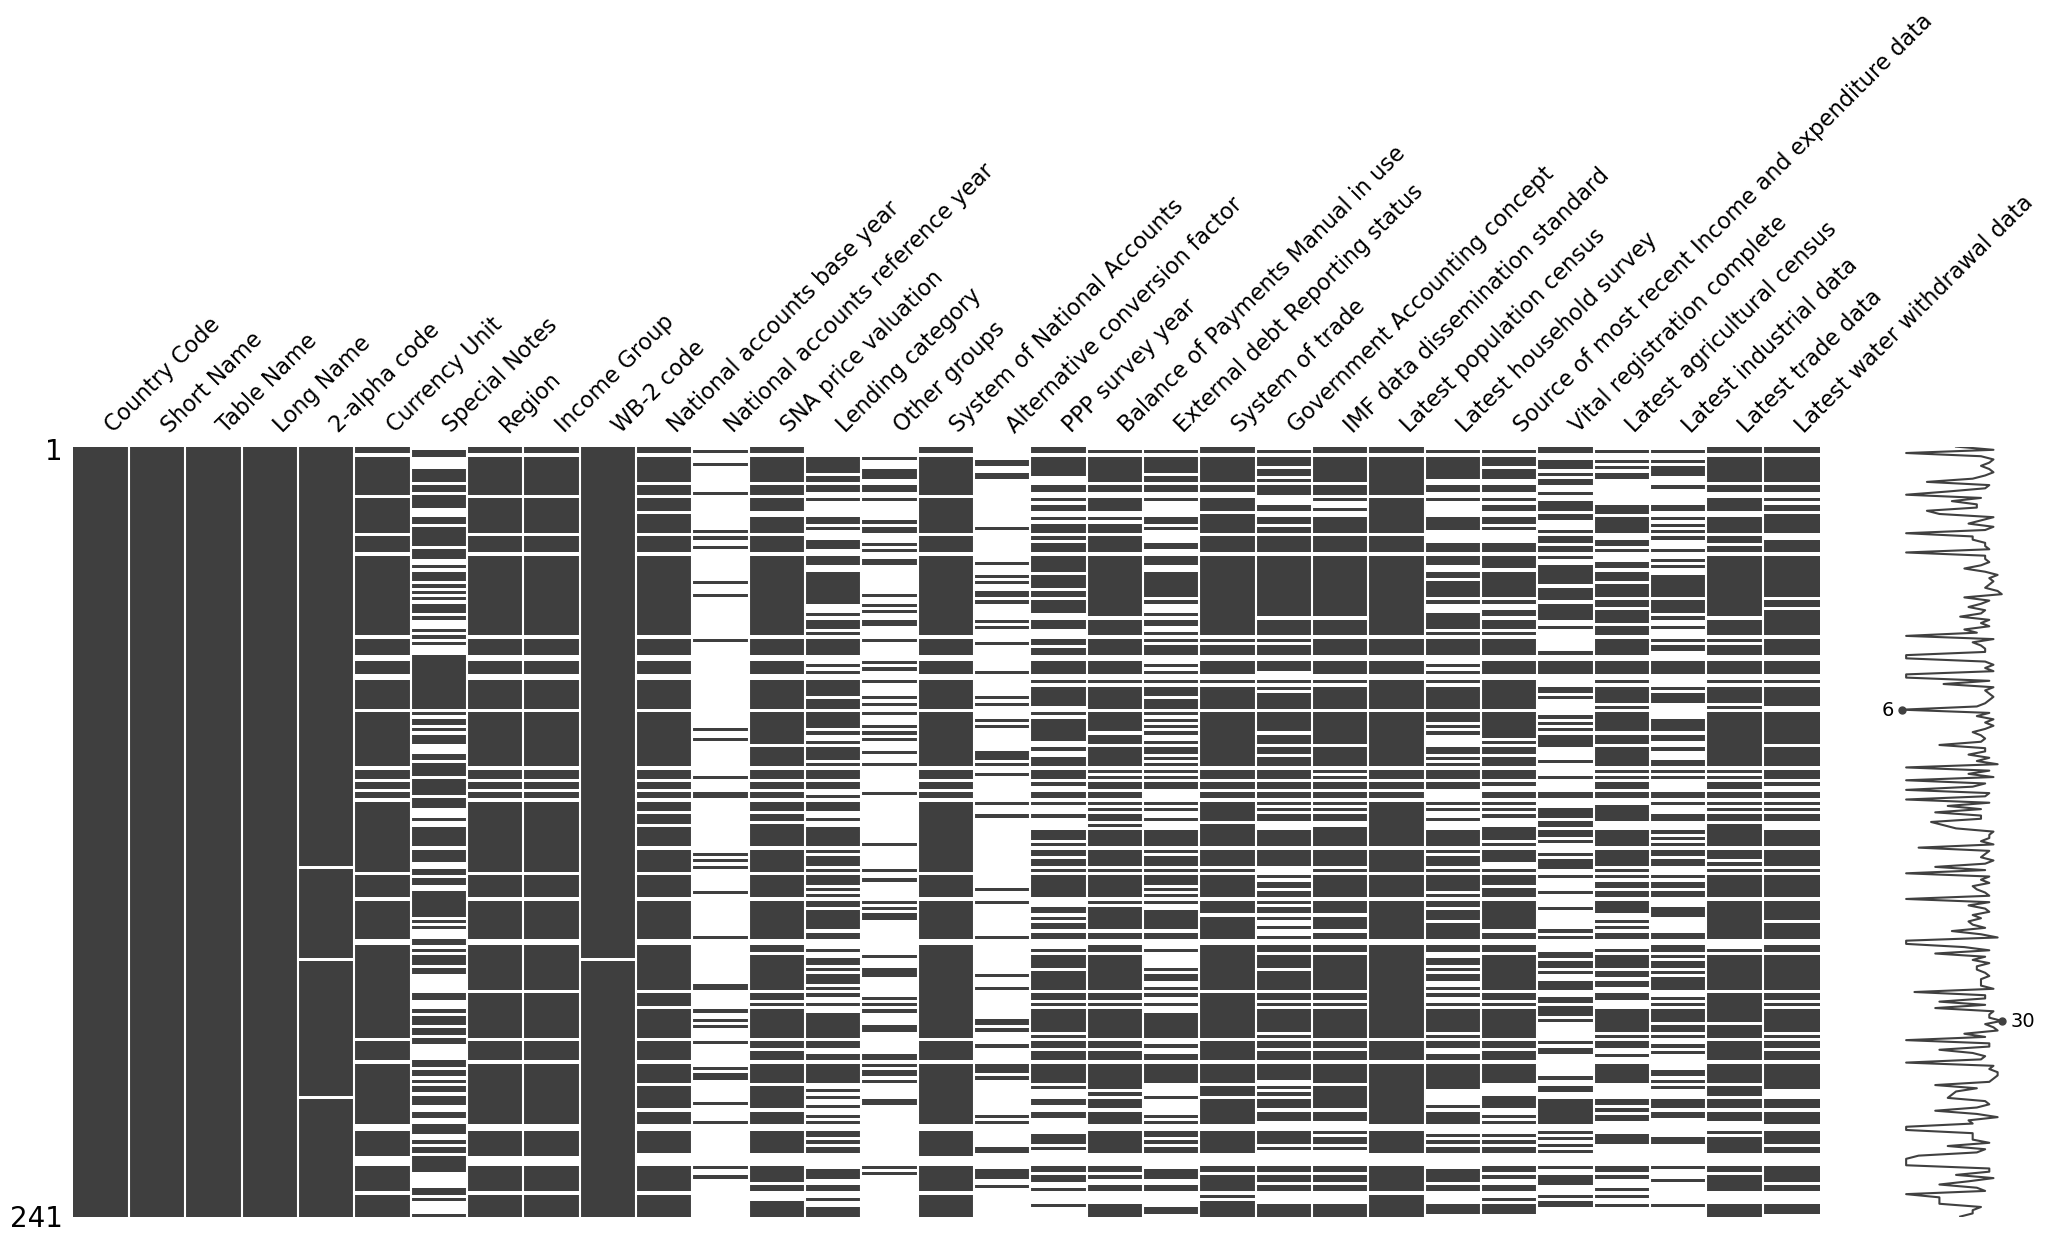

In [9]:
# 📌 9. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# `df.isnull()` - Crée un dataframe booléen de même forme que `df`, où `True` indique une valeur manquante (NaN) 
# et `False` indique une valeur non manquante.
# `.mean()` - Calcule la moyenne de ces valeurs booléennes pour chaque colonne, ce qui donne la proportion de valeurs manquantes (entre 0 et 1).
# `* 100` - Multiplie ces proportions par 100 pour les convertir en pourcentages.
# `.round(1)` - Arrondit les pourcentages à 1 décimale pour un affichage plus propre.
# `.sort_values(ascending=False)` - Trie les pourcentages par ordre décroissant, 
# de sorte que les colonnes avec le plus de valeurs manquantes apparaissent en premier.


# 📌 9.bis Valeurs manquantes avec missingno
%matplotlib inline
msno.matrix(df.sample(df.shape[0]))



In [ ]:
# 📌 10. Statistiques descriptives des colonnes numériques 
# Sélection des colonnes numériques contenant uniquement des années (entiers à 4 chiffres)
colonnes_annees = []
for col in df.select_dtypes(include='number').columns:
    valeurs = df[col].dropna().unique()
    if all((val % 1 == 0) and (1900 <= val <= 2100) for val in valeurs):
        colonnes_annees.append(col)
        
print("\n Colonnes numériques identifiées (attention  ce sont  des années) :", colonnes_annees)

#for col in colonnes_annees:
#    plt.figure(figsize=(8, 4))
#    sns.countplot(x=df[col].dropna().astype(int), color='steelblue')
#    plt.title(f"Distribution des années pour : {col}")
#    plt.xlabel("Année")
#    plt.ylabel("Nombre de pays")
#    plt.xticks(rotation=45)
#    plt.grid(axis='y')
#    plt.tight_layout()
#    plt.show()

#for col in colonnes_annees:
#    print(f"\n🔹 {col}")
#    print("Années disponibles :", sorted(df[col].dropna().unique().astype(int)))
#   print(df[col].value_counts().sort_index())



In [10]:
# 📌 11. Analyse des colonnes catégorielles

# Affiche les types de colonnes
display(df.dtypes)




Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [11]:
# 📌 11.bis Sélectionne les colonnes catégorielles (de type object)
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Boucle sur chaque colonne catégorielle pour afficher les occurrences
for col in df_cat.columns:
    print(f"\n📌 Colonne '{col}' :")
    print(df_cat[col].value_counts())



🔠 Nombre d'occurrences des valeurs catégorielles :

📌 Colonne 'Country Code' :
ABW    1
LCA    1
MRT    1
MUS    1
MWI    1
      ..
GRL    1
GTM    1
GUM    1
GUY    1
ZWE    1
Name: Country Code, Length: 241, dtype: int64

📌 Colonne 'Short Name' :
Aruba         1
St. Lucia     1
Mauritania    1
Mauritius     1
Malawi        1
             ..
Greenland     1
Guatemala     1
Guam          1
Guyana        1
Zimbabwe      1
Name: Short Name, Length: 241, dtype: int64

📌 Colonne 'Table Name' :
Aruba         1
St. Lucia     1
Mauritania    1
Mauritius     1
Malawi        1
             ..
Greenland     1
Guatemala     1
Guam          1
Guyana        1
Zimbabwe      1
Name: Table Name, Length: 241, dtype: int64

📌 Colonne 'Long Name' :
Aruba                              1
St. Lucia                          1
Islamic Republic of Mauritania     1
Republic of Mauritius              1
Republic of Malawi                 1
                                  ..
Greenland                          1

In [ ]:
# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)

## 🌍 Hypothèse sémantique des colonnes – `EdStatsCountry.csv`

Chaque ligne représente **un pays unique** décrit par des métadonnées géographiques, économiques et administratives, telles que définies par la Banque mondiale.

| 🏷️ Colonne                                | 💬 Hypothèse de signification |
|-------------------------------------------|-------------------------------|
| **Country Code**                          | Code ISO 3166-1 alpha-3 à 3 lettres (ex. *FRA*, *KEN*), identifiant unique du pays. |
| **Short Name**                            | Nom abrégé du pays (ex. *France*, *Kenya*). |
| **Table Name**                            | Nom utilisée dans les tables de base de données connnexes. |
| **Long Name**                             | Dénomination longue du pays (ex. *French Republic*). |
| **2-alpha code**                          | Code ISO 3166-1 alpha-2 à 2 lettres (ex. *FR*, *KE*). |
| **Currency Unit**                         | Nom de la devise nationale (ex. *Euro*, *Kenyan Shilling*). |
| **Special Notes**                         | Remarques spécifiques sur la qualité ou le contexte des données. |
| **Region**                                | Région géographique selon la Banque mondiale (ex. *Europe & Central Asia*). |
| **Income Group**                          | Groupe de revenu du pays selon la Banque mondiale (*Low*, *Lower middle*, *Upper middle*, *High income*). |
| **WB-2 code**                             | Code interne de la Banque mondiale à 2 lettres (souvent identique au `2-alpha code`). |
| **National accounts base year**           | Année de base des comptes nationaux (ex. *2015*). |
| **National accounts reference year**      | Année de référence utilisée pour les prix constants. |
| **SNA price valuation**                   | Type de prix utilisé dans le Système de Comptabilité Nationale (*market prices*, *basic prices*). |
| **Lending category**                      | Catégorie d’éligibilité aux financements Banque mondiale (*IBRD*, *IDA*, *Blend*, etc.). |
| **Other groups**                          | Autres classifications auxquelles appartient le pays (*OECD*, *LDC*, *Fragile States*, etc.). |
| **System of National Accounts**           | Version du SNA utilisée (ex. *SNA 1993*, *SNA 2008*). |
| **Alternative conversion factor**         | Facteur alternatif de conversion des monnaies, si disponible. |
| **PPP survey year**                       | Année de la dernière enquête sur la parité de pouvoir d'achat. |
| **Balance of Payments Manual in use**     | Édition du manuel utilisée pour la balance des paiements (*BPM5*, *BPM6*). |
| **External debt Reporting status**        | Statut de la déclaration de la dette extérieure (ex. *Reported*, *No data*). |
| **System of trade**                       | Méthode utilisée pour comptabiliser le commerce international (*General*, *Special trade system*). |
| **Government Accounting concept**         | Méthode comptable du gouvernement (*Cash basis*, *Accrual basis*, etc.). |
| **IMF data dissemination standard**       | Niveau d’adhésion aux standards statistiques du FMI (*SDDS*, *GDDS*). |
| **Latest population census**              | Année du dernier recensement officiel de population. |
| **Latest household survey**               | Année de la dernière enquête ménage/niveau de vie. |
| **Source of most recent Income and expenditure data** | Source utilisée pour les données les plus récentes sur les revenus et dépenses. |
| **Vital registration complete**           | Indique si les registres d’état civil sont complets (*Yes*, *No*, ou manquant). |
| **Latest agricultural census**            | Année du dernier recensement agricole. |
| **Latest industrial data**                | Année des dernières données industrielles disponibles. |
| **Latest trade data**                     | Année des dernières données sur le commerce extérieur. |
| **Latest water withdrawal data**          | Année des dernières données sur les prélèvements d’eau. |


---

### ✅ Synthèse

- 📌 Ce fichier est une **base de métadonnées pays**.
- Utile comme **référentiel principal** pour relier des indicateurs macroéconomiques, sociaux et environnementaux.
- Chaque colonne contient un **attribut structurant ou descriptif** utilisé par la Banque mondiale pour contextualiser ses séries temporelles.
- Si un pays ne posède pas de région, on dira que c'est une faux pays (cf. exercice suivant)

In [12]:

# 📌 1. Chargement du fichier
file_path = "dataprojet2/EdStatsCountry-Series.csv"
df = pd.read_csv(file_path)

# 📌 2. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 3. Définition d’une ligne
print("\n🧾 Chaque ligne représente un indicateur de suivi (statistique) pour un pays donné..")

# 📌 4. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 6. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 7. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 8. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 9. Statistiques descriptives des colonnes numériques
print("\n🧾 Non applicable.")


# 📌 10. Analyse des colonnes catégorielles
display(df.dtypes)
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN



🧾 Chaque ligne représente un indicateur de suivi (statistique) pour un pays donné..

📐 Dimensions : 613 lignes × 4 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 3     100.0
CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 3']

🧾 Non applicable.


CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object


🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
CountryCode,211,MDA,18
SeriesCode,21,SP.POP.TOTL,211
DESCRIPTION,97,Data sources : United Nations World Population...,154


## 📘 Hypothèse sémantique des colonnes – `EdStatsCountrySeries.csv`

Chaque ligne représente **un indicateur de suivi** (statistique) **pour un pays donné**.  
C’est un fichier pivot reliant les pays aux séries statistiques proposées par la Banque mondiale.

| 🏷️ Colonne | 💬 Hypothèse de signification |
|------------|-------------------------------|
| **CountryCode** | Code ISO à 3 lettres représentant le pays concerné (ex. *FRA*, *KEN*). |
| **SeriesCode** | Code identifiant une série statistique (ex. *SE.TER.ENRR* pour taux de scolarisation dans le supérieur). |
| **DESCRIPTION** | Description textuelle de l’indicateur suivi. Sert à comprendre la signification du `SeriesCode`. |

---

### ✅ Synthèse :

- Ce fichier sert à **documenter** les indicateurs éducatifs.
- C’est une table d’association **Pays ↔ Série ↔ Description détaillée**.



In [13]:
# 📌 1. Import des librairies
# déjà fait



# 📌 2. Chargement du fichier
file_path = "dataprojet2/EdStatsData.csv"
df = pd.read_csv(file_path)

# 📌 3. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 4. Définition d’une ligne
print("\n🧾 Chaque ligne représente pour chaque pays, une  série d'indicateur et leur évolution au cours des ans.")

# 📌 5. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 6. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 7. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 8. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 9. Statistiques descriptives des colonnes numériques
# display(df.dtypes)

# df_numeric = df.select_dtypes(include='number')
# print("\n📈 Statistiques descriptives (numériques) :")
# display(df_numeric.describe().T)


# 📌 10. Analyse des colonnes catégorielles
display(df.dtypes)
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🧾 Chaque ligne représente pour chaque pays, une  série d'indicateur et leur évolution au cours des ans.

📐 Dimensions : 886930 lignes × 70 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 69       100.0
2017              100.0
2016               98.1
1971               96.0
1972               96.0
                  ...  
2010               72.7
Country Code        0.0
Indicator Code      0.0
Indicator Name      0.0
Country Name        0.0
Length: 70, dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 69']


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2080              float64
2085              float64
2090              float64
2095              float64
2100              float64
Length: 69, dtype: object


🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
Country Name,242,Arab World,3665
Country Code,242,ARB,3665
Indicator Name,3665,"Adjusted net enrolment rate, lower secondary, ...",242
Indicator Code,3665,UIS.NERA.2,242


## 📘 Hypothèse sémantique des colonnes – `EdStatsData.csv`

Ce fichier contient les **valeurs numériques des indicateurs éducatifs** fournis par la Banque mondiale.  
Chaque ligne représente une mesure pour **un pays, un indicateur et une année**.

| 🏷️ Colonne | 💬 Signification hypothétique |
|------------|-------------------------------|
| **Country Name** | Nom complet du pays concerné (ex. *France*, *India*). |
| **Country Code** | Code ISO à 3 lettres (ex. *FRA*, *IND*), identifiant unique du pays. |
| **Indicator Name** | Nom descriptif de l’indicateur (ex. *School enrollment, tertiary (% gross)*). |
| **Indicator Code** | Code court de l’indicateur (ex. *SE.TER.ENRR*). Sert de clé pour faire des jointures avec `EdStatsCountrySeries.csv`. |
| **1960**, **1961**, ..., **2022** | Une colonne par année : valeurs numériques (taux, population,  etc.). Valeurs souvent manquantes pour les années anciennes ou récentes. |

---

### ✅ Remarques :

- 📌 **Colonnes de type temporel** : de 1960 à 2022 (selon la version).
- 📌 C’est un **format large**, appelé *wide format* :
    - Une ligne = un pays + un indicateur
    - Les années sont des colonnes.
- Pour la visualisation ou modélisation, il est souvent nécessaire de **convertir ce format en "long format"** avec `pd.melt()`.

---

### 📊 Exemple :

Une ligne contient par exemple :

- `Country Name` = "Brazil"  
- `Indicator Name` = "School enrollment, primary (% gross)"  
- `1960` = 83.1  
- `1961` = 84.5  
- ...  
- `2020` = 97.2

Cela signifie que le **taux brut de scolarisation primaire** au Brésil était de **83.1% en 1960**, 97.2% en 2020, etc.

---


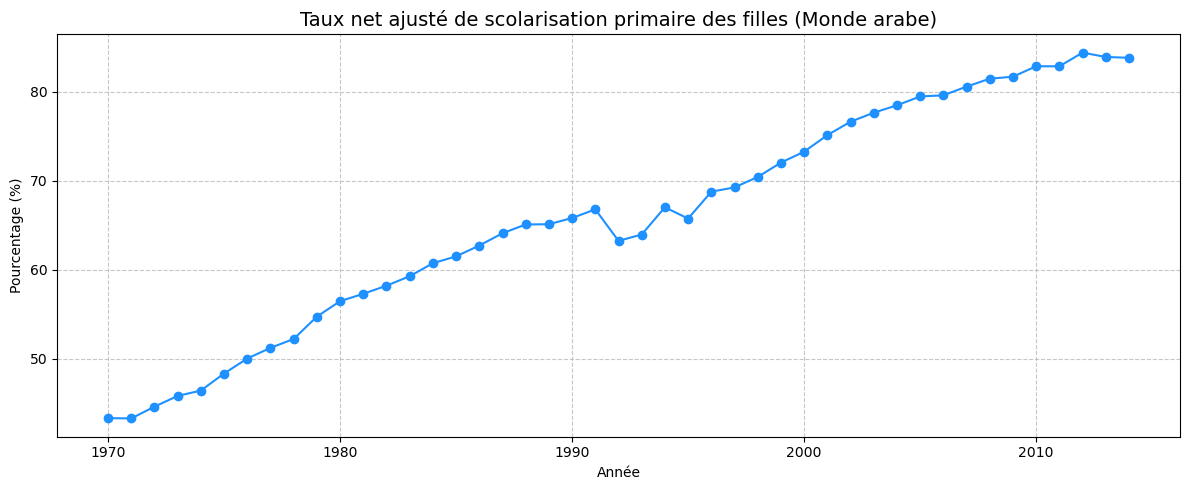

In [14]:
# pas besoin import pandas as pd
# import matplotlib.pyplot as plt

# 📥 Chargement du fichier (en chunk si lourd)
file_path = "dataprojet2/EdStatsData.csv"
chunks = pd.read_csv(file_path, chunksize=10_000)

# 🎯 Filtrage exact pour Arab World & l'indicateur demandé
target_country = "Arab World"
target_indicator = "Adjusted net enrolment rate, primary, female (%)"

# 🔍 Recherche dans les chunks
for chunk in chunks:
    subset = chunk[
        (chunk['Country Name'] == target_country) &
        (chunk['Indicator Name'] == target_indicator)
    ]
    if not subset.empty:
        df_arab = subset
        break

# 🔢 Extraction des colonnes d'années (1970 à 2014)
years = [str(y) for y in range(1970, 2015)]
df_arab_years = df_arab[years].T
df_arab_years.columns = ['Taux (%)']
df_arab_years.index.name = 'Année'
df_arab_years = df_arab_years.dropna()
df_arab_years.index = df_arab_years.index.astype(int)

# 📊 Visualisation
plt.figure(figsize=(12, 5))
plt.plot(df_arab_years.index, df_arab_years['Taux (%)'], marker='o', color='dodgerblue')
plt.title("Taux net ajusté de scolarisation primaire des filles (Monde arabe)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Pourcentage (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


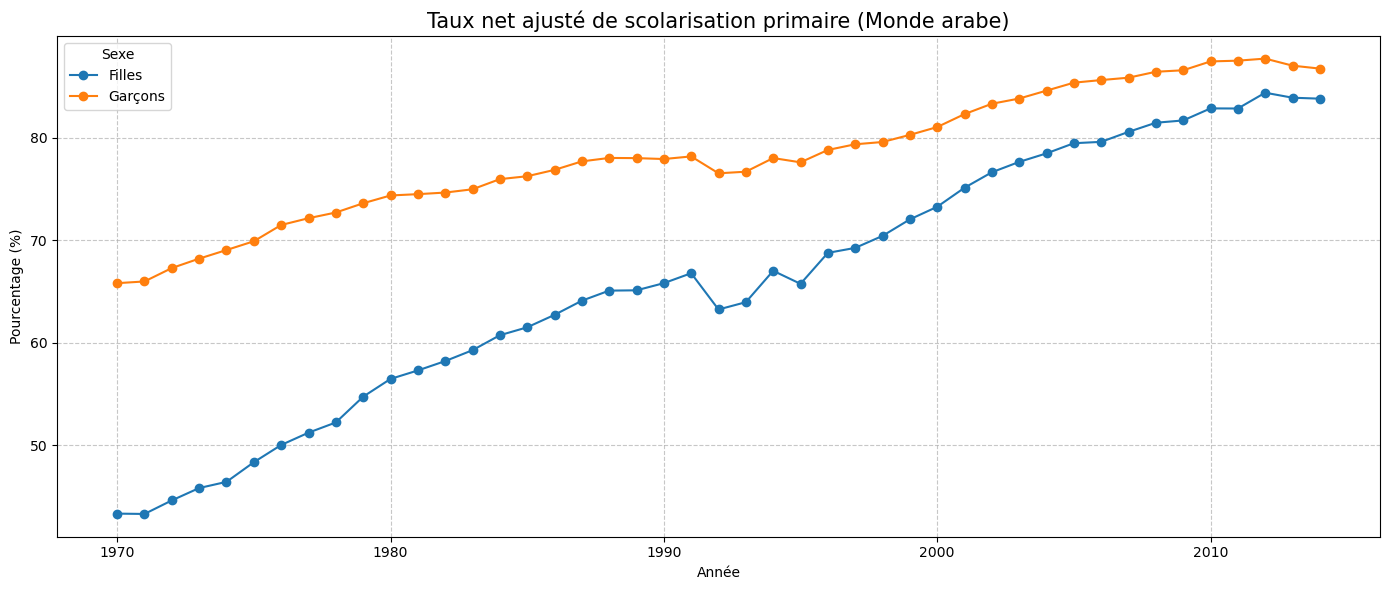

In [15]:
# déjà fait import pandas as pd
# import matplotlib.pyplot as plt

# 📥 Chargement en chunks car fichier volumineux
file_path = "dataprojet2/EdStatsData.csv"
chunks = pd.read_csv(file_path, chunksize=10_000)

# 🎯 Paramètres de recherche
target_country = "Arab World"
indicators = {
    "Filles": "Adjusted net enrolment rate, primary, female (%)",
    "Garçons": "Adjusted net enrolment rate, primary, male (%)"
}

data = {}

# 🔍 Parcours des chunks pour extraire les 2 indicateurs
for chunk in chunks:
    for label, indicator in indicators.items():
        if label not in data:
            subset = chunk[
                (chunk['Country Name'] == target_country) &
                (chunk['Indicator Name'] == indicator)
            ]
            if not subset.empty:
                data[label] = subset
    if len(data) == len(indicators):
        break

# 📆 Extraction des colonnes d'années
years = [str(y) for y in range(1970, 2015)]

plt.figure(figsize=(14, 6))

for label, df in data.items():
    df_years = df[years].T
    df_years.columns = ['Taux (%)']
    df_years.index.name = 'Année'
    df_years = df_years.dropna()
    df_years.index = df_years.index.astype(int)

    plt.plot(df_years.index, df_years['Taux (%)'], marker='o', label=label)

# 🖼️ Mise en forme
plt.title("Taux net ajusté de scolarisation primaire (Monde arabe)", fontsize=15)
plt.xlabel("Année")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Sexe")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 📊 Analyse du taux net ajusté de scolarisation primaire (Monde arabe)

### 1️⃣ Observation pour les filles (Graphique 1)
- **Progression continue** de 1970 (≈43 %) à 2014 (≈84 %).
- Accélération notable **entre 1970 et le début des années 2000**, traduisant une amélioration significative de l’accès des filles à l’éducation primaire.
- Quelques **ralentissements** ou **stagnations** visibles autour des années 1990 et 2010.
- La tendance globale reste **fortement positive**, montrant un rattrapage important sur la période.

---

### 2️⃣ Comparaison filles vs garçons (Graphique 2)
- En 1970, **écart important** : garçons ≈ 66 %, filles ≈ 43 % (≈ 23 points de différence).
- Les **deux courbes progressent** sur la période, mais celle des filles augmente **plus rapidement**, réduisant progressivement l’écart.
- À partir des années 2000, l’écart se réduit à **moins de 5 points**, traduisant un rapprochement marqué en termes de scolarisation.
- Les garçons maintiennent néanmoins un **taux légèrement supérieur** tout au long de la période.
- Les deux sexes atteignent des niveaux élevés (> 80 %) en fin de période, signe d’une **quasi-universalisation** de l’accès à l’éducation primaire.

---

### 3️⃣ Points clés à retenir
- **Réduction significative de l’écart de genre** en éducation primaire dans le Monde arabe.
- **Amélioration globale** de l’accès à l’école pour tous, avec une dynamique particulièrement forte pour les filles.
- Les politiques éducatives et initiatives pour promouvoir l’éducation des filles semblent avoir eu un **impact mesurable**.
- Malgré tout, un **petit écart persistant** en faveur des garçons demeure.

---

**En résumé :**  
Entre 1970 et 2014, le Monde arabe a connu une forte progression de la scolarisation primaire, particulièrement pour les filles, réduisant fortement l’inégalité entre sexes. La tendance générale est à l’universalisation, même si la parité parfaite n’est pas encore totalement atteinte.


In [16]:
# 📌 1. Chargement du fichier
file_path = "dataprojet2/EdStatsFootnote.csv"
df = pd.read_csv(file_path)

# 📌 2. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 3. Définition d’une ligne
print("\n🧾 Chaque ligne présente pour une série statistique d'un pays une annotation technique renseignant comment a été effectuée cette série.")

# 📌 4. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 5. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 6. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 7. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 7. Statistiques descriptives des colonnes numériques
print("\n📈 Statistiques descriptives (numériques) : non applicable")


# 📌 9 Analyse des colonnes catégorielles
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN



🧾 Chaque ligne présente pour une série statistique d'un pays une annotation technique renseignant comment a été effectuée cette série.

📐 Dimensions : 643638 lignes × 5 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 4     100.0
CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unnamed: 4']

📈 Statistiques descriptives (numériques) : non applicable

🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
CountryCode,239,LIC,7320
SeriesCode,1558,SH.DYN.MORT,9226
Year,56,YR2004,27128
DESCRIPTION,9102,Country Data,191188


## 📘 Hypothèse sémantique des colonnes – `EdStatsFootNote.csv`

Ce fichier contient les **annotations techniques** (footnotes) concernant certaines données statistiques sur l'éducation, fournies par la Banque mondiale.  
Il permet de **qualifier** les données présentes dans des jeux comme `EdStatsData.csv` lorsque celles-ci sont **estimées**, **modélisées** ou **issues de sources alternatives**.

---

### 🧾 Dictionnaire des variables

| 🏷️ Colonne       | 💬 Signification probable |
|------------------|---------------------------|
| **CountryCode**  | Code ISO alpha-3 du pays (ex : `ABW` pour Aruba). |
| **SeriesCode**   | Code unique d’un indicateur éducatif (ex. `SE.PRE.ENRL.FE` pour le taux d'inscription des filles à la maternelle). |
| **Year**         | Année à laquelle la note s’applique, au format `YRxxxx` (ex. `YR2001` pour 2001). |
| **DESCRIPTION**  | Texte indiquant le type de note (par exemple : `"Country estimation."` signifie que la donnée est une estimation et non une mesure directe). |

---

### 🧠 Utilité du fichier

- Il permet d’**annoter les données chiffrées** avec des précisions sur leur origine ou qualité.
- Il est utile pour **filtrer** les valeurs estimées ou douteuses lors des analyses.
- Peut être utilisé en **jointure** avec d’autres jeux de données (comme `EdStatsData.csv`) via les colonnes `CountryCode`, `SeriesCode` et `Year`.

---

### 🧩 Exemple d'interprétation

```text
CountryCode: ABW  
SeriesCode : SE.PRE.ENRL.FE  
Year       : YR2001  
DESCRIPTION: Country estimation.

➡️ Interprétation : En 2001, pour Aruba (ABW), la donnée liée au taux d’inscription des filles à la maternelle est une estimation nationale.

In [17]:


# 📌 1. Chargement du fichier
file_path = "dataprojet2/EdStatsSeries.csv"
df = pd.read_csv(file_path)

# 📌 2. Aperçu du fichier
print("🔍 Aperçu du fichier :")
display(df.head())

# 📌 3. Définition d’une ligne
print("\n🧾 Chaque ligne traduit les codes d’indicateur en intitulés clairs avec des données contextuelles.")

# 📌 5. Dimensions du fichier
print(f"\n📐 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes.")

# 📌 4. Nombre de doublons
nb_doublons = df.duplicated().sum()
print(f"\n📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés.")

# 📌 5. Valeurs manquantes
print("\n🔍 Pourcentage de valeurs manquantes par colonne :")
display((df.isnull().mean() * 100).round(1).sort_values(ascending=False))

# 📌 6. Suppression des colonnes 100 % vides
colonnes_vides = df.columns[df.isnull().mean() == 1.0]
df.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")

# 📌 7. Statistiques descriptives des colonnes numériques
print("\n📈 Statistiques descriptives (numériques) : non applicable")


# 📌 8 Analyse des colonnes catégorielles
df_cat = df.select_dtypes(include='object')
print("\n🔠 Nombre d'occurrences des valeurs catégorielles :")

# Construction d'un résumé synthétique
summary = {}
for col in df_cat.columns:
    value_counts = df[col].value_counts(dropna=False)
    top = value_counts.index[0]
    freq = value_counts.iloc[0]
    unique = df[col].nunique(dropna=False)
    summary[col] = {
        "Nb valeurs uniques": unique,
        "Valeur la + fréquente": top,
        "Nb d’occurrences": freq
    }

summary_df = pd.DataFrame(summary).T
display(summary_df)


🔍 Aperçu du fichier :


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🧾 Chaque ligne traduit les codes d’indicateur en intitulés clairs avec des données contextuelles.

📐 Dimensions : 3665 lignes × 21 colonnes.

📎 Nombre de doublons : 0

🔍 Pourcentage de valeurs manquantes par colonne :


Unnamed: 20                            100.0
Notes from original source             100.0
License Type                           100.0
Related indicators                     100.0
Other web links                        100.0
Unit of measure                        100.0
Development relevance                   99.9
General comments                        99.6
Limitations and exceptions              99.6
Statistical concept and methodology     99.4
Aggregation method                      98.7
Periodicity                             97.3
Related source links                    94.1
Base Period                             91.4
Other notes                             84.9
Short definition                        41.2
Topic                                    0.0
Source                                   0.0
Long definition                          0.0
Indicator Name                           0.0
Series Code                              0.0
dtype: float64

🗑️ Colonnes supprimées (100% vides) : ['Unit of measure', 'Notes from original source', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

📈 Statistiques descriptives (numériques) : non applicable

🔠 Nombre d'occurrences des valeurs catégorielles :


,Nb valeurs uniques,Valeur la + fréquente,Nb d’occurrences
Series Code,3665,BAR.NOED.1519.FE.ZS,1
Topic,37,Learning Outcomes,1046
Indicator Name,3665,Barro-Lee: Percentage of female population age...,1
Short definition,1170.0,NaN,1509.0
Long definition,2060,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,215
Periodicity,2.0,NaN,3566.0
Base Period,5.0,NaN,3351.0
Other notes,15.0,NaN,3113.0
Aggregation method,4.0,NaN,3618.0
Limitations and exceptions,10.0,NaN,3651.0


## 📘 Hypothèse sémantique des colonnes – `EdStatsSeries.csv`

Ce fichier contient la **métadonnée des indicateurs éducatifs** utilisés dans les jeux de données précédents.

Chaque **ligne** représente un **indicateur unique**, identifié par son code. Ce fichier sert de **référentiel explicatif** pour comprendre les codes présents dans les fichiers de données, comme `IndicatorCode` dans `EdStatsData.csv`.

---

### 📋 Dictionnaire hypothétique des colonnes

| 🏷️ Colonne                    | 💬 Signification probable |
|------------------------------|---------------------------|
| **Series Code**              | Code unique de l’indicateur (ex : `BAR.NOED.1519.FE.ZS`). Il est utilisé pour faire le lien avec les valeurs dans `EdStatsData.csv`. |
| **Topic**                    | Thématique ou domaine de l’indicateur (ex : `Attainment`, `Access`, `Teachers`, etc.). |
| **Indicator Name**           | Nom complet de l’indicateur (ex : `Barro-Lee: Percentage of female population age 15-19 with no education`). |
| **Short definition**         | Définition courte de l’indicateur. |
| **Long definition**          | Définition détaillée et officielle de l’indicateur. |
| **Unit of measure**          | Unité dans laquelle la mesure est exprimée (ex : `%`, nombre absolu, échelle 0–100). |
| **Periodicity**              | Fréquence de mise à jour de l’indicateur (ex : annuelle, biennale). |
| **Base Period**              | Période de référence si l’indicateur est indexé (souvent vide). |
| **Other notes**              | Autres commentaires liés à l’indicateur. |
| **Aggregation method**       | Méthode d’agrégation statistique utilisée si les données sont agrégées à un niveau régional ou mondial. |
| **Limitations and exceptions** | Limites connues de l’indicateur ou exceptions dans les données collectées. |
| **Notes from original source** | Commentaires ou avertissements provenant de la source d’origine des données. |
| **General comments**         | Commentaires généraux. |
| **Source**                   | Nom de la source responsable de l’indicateur (ex : Banque mondiale, Barro-Lee, UNESCO, etc.). |
| **Statistical concept and methodology** | Méthodologie statistique utilisée pour produire les données. |
| **Development relevance**    | Explication de l’intérêt de l’indicateur pour le développement éducatif. |
| **Related source links**     | Liens externes vers des sources supplémentaires (URL). |
| **Other web links**          | Autres ressources utiles (URL). |
| **Related indicators**       | Liste des codes d’indicateurs connexes. |
| **License Type**             | Informations sur la licence d’utilisation des données (ex : Open, Restricted). |

---

### 🧠 Exemple de ligne interprétée

```text
Series Code   : BAR.NOED.1519.FE.ZS  
Topic         : Attainment  
Indicator Name: Barro-Lee: Percentage of female population age 15-19 with no education  
Short def     : Percentage of female population age 15-19 with no education  
Unit          : %  
Source        : Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/

➡️ Cet indicateur mesure la part des filles de 15 à 19 ans sans éducation dans un pays donné, selon la base de données de Barro-Lee.

🔁 Utilité du fichier
Ce fichier est indispensable pour :

traduire les codes d’indicateur en intitulés clairs pour les visualisations ou tableaux.

filtrer des indicateurs spécifiques à un sujet (par exemple, uniquement ceux sur l'alphabétisation ou l’éducation primaire).

documenter les analyses pour les décideurs non techniques.


# 🌍 Nettoyage des "faux pays" dans les données de la Banque mondiale

---

## 🎯 Objectif

Dans les fichiers `EdStatsData.csv` et `EdStatsCountry.csv` de la Banque mondiale,  
il existe de nombreuses **lignes qui ne représentent pas de vrais pays** :  

- Agrégats régionaux :  
  *"Arab World"*, *"Sub-Saharan Africa"*, *"World"*  
- Groupes économiques ou autres regroupements :  
  *"High income"*, *"Euro area"*, *"OECD members"*  
- Catégories techniques :  
  *"IDA blend"*, *"IBRD only"*  

Ces **faux pays** peuvent fausser les statistiques par pays.  
Notre objectif est de **les éliminer** pour ne garder que les **vrais pays souverains**.

---

## 1️⃣ Méthode via la table des pays (`EdStatsCountry.csv`)

Le fichier `EdStatsCountry.csv` contient :  

- `CountryCode` → code ISO ou code interne Banque mondiale  
- `ShortName` / `TableName` → nom du pays  
- `Region` → continent ou regroupement géographique  
- `IncomeGroup` → catégorie économique (High income, Low income, etc.)  

💡 **Idée principale :**  
- Les **vrais pays** ont toujours une **`Region` renseignée**  
- Les **agrégats régionaux** ou techniques ont souvent `Region = ""` (vide)  

### 🔹 Étapes

1. Charger `EdStatsCountry.csv`  
2. Filtrer les pays avec une `Region` non nulle  
3. Joindre ce DataFrame à vos données `EdStatsData.csv` via `Country Code`  
4. Supprimer toutes les lignes qui ne trouvent pas de correspondance → ce sont vos **faux pays**

---

## 2️⃣ Méthode basée sur un code ISO-3166

- Les **vrais pays** ont en général un code **ISO-3166 alpha-3** (ex: FRA, USA, BRA)  
- Les **faux pays** ont souvent des codes spécifiques à la Banque mondiale :  
  - `WLD` (World)  
  - `ARB` (Arab World)  
  - `LMY` (Low & middle income)  

💡 **Stratégie complémentaire :**  
- Créer une **liste blanche** des vrais codes ISO (fichier officiel ou package `pycountry`)  
- Supprimer tous les codes qui ne figurent pas dans cette liste

---

## 3️⃣ Méthode via la fréquence dans d’autres fichiers

Dès lors que l'on possède **plusieurs fichiers EdStats** (Data, Series, Country) :  

- Joindre `EdStatsData.csv` à `EdStatsCountry.csv` sur `Country Code`  
- Conserver uniquement les codes présents dans les **analyses métier**  
- Supprimer tous ceux qui :  
  - N’ont **aucune région**  
  - Et/ou n’apparaissent **jamais dans une analyse pertinente**

---

## 4️⃣ Méthode mixte (c'est celle que nous allons suivre)

1. **Base** : Filtrage par `Region` non vide  
2. **Complément** : Liste blanche de codes ISO valides  
3. **Sécurité** : Vérification sur le nombre minimum de lignes (un vrai pays doit avoir au moins quelques indicateurs valides)

---

✅ **Avantages de cette approche :**  

- Réduit le bruit dans les statistiques  
- Assure que nos analyses **pays** ne soient pas polluées par des régions ou des agrégats mondiaux  
- Prépare nos données pour une analyse **géographique ou cartographique** cohérente

---

💡 **Bonnes pratiques :**

- **Conservez un DataFrame séparé** des faux pays détectés pour traçabilité  
- **Documentez vos choix** : certains agrégats peuvent être utiles pour d’autres analyses globales


## 🧹 Nettoyage des "faux pays" par méthode mixte

**Objectif :**
- Éliminer les codes pays qui ne représentent pas des **pays souverains**.
- Combiner :
  1. **Filtrage par `Region` non vide** dans `EdStatsCountry.csv`
  2. **Vérification par codes ISO-3166** (facultative, pour plus de robustesse)
- Conserver :
  - Un DataFrame filtré avec **les vrais pays**
  - Une **liste Python** de codes valides pour réutilisation
  - Un **DataFrame des faux pays** pour traçabilité


In [18]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [19]:
# ==========================================
# 📌 Nettoyage des "faux pays" - Méthode mixte
# ==========================================



# 1️⃣ Chargement des fichiers
df_data = pd.read_csv("dataprojet2/EdStatsData.csv")
df_country = pd.read_csv("dataprojet2/EdStatsCountry.csv")

print(f"🔹 Dimensions initiales Data : {df_data.shape}")
print(f"🔹 Dimensions table pays : {df_country.shape}")

# 2️⃣ Filtrage de base : Region non vide
df_country_valid = df_country[df_country['Region'].notna() & (df_country['Region'] != '')].copy()

print(f"✅ Nombre de pays avec Region renseignée : {df_country_valid.shape[0]}")

# 3️⃣ Option ISO (liste blanche)
# - Si la colonne "Country Code" est ISO-3 classique, on peut vérifier avec pycountry
import pycountry

# Création d'une liste de codes ISO3 officiels
iso3_valid = {c.alpha_3 for c in pycountry.countries}

# On conserve les pays dont le code est ISO3 valide
df_country_valid = df_country_valid[df_country_valid['Country Code'].isin(iso3_valid)].copy()

print(f"✅ Nombre de vrais pays (Region renseignée + ISO3 valide) : {df_country_valid.shape[0]}")

# 4️⃣ Création de la liste des codes de vrais pays
liste_vrais_pays = df_country_valid['Country Code'].tolist()

# 5️⃣ Jointure pour filtrer le DataFrame principal
df_data_filtre_pays = df_data[df_data['Country Code'].isin(liste_vrais_pays)].copy()

print(f"📐 Dimensions DataFrame après suppression des faux pays : {df_data_filtre_pays.shape}")

# 6️⃣ Identification des faux pays pour traçabilité
df_faux_pays = df_data[~df_data['Country Code'].isin(liste_vrais_pays)].copy()
liste_faux_pays = df_faux_pays['Country Name'].unique().tolist()

print(f"🚫 Nombre de faux pays détectés : {len(liste_faux_pays)}")
print("🔹 Exemples de faux pays :", liste_faux_pays[:10])

# 7️⃣ Résumé : trois objets réutilisables
# - df_data_filtre_pays : DataFrame nettoyé pour analyses
# - df_faux_pays : DataFrame des faux pays pour traçabilité
# - liste_vrais_pays : liste Python des codes de vrais pays


🔹 Dimensions initiales Data : (886930, 70)
🔹 Dimensions table pays : (241, 32)
✅ Nombre de pays avec Region renseignée : 214
✅ Nombre de vrais pays (Region renseignée + ISO3 valide) : 212
📐 Dimensions DataFrame après suppression des faux pays : (776980, 70)
🚫 Nombre de faux pays détectés : 30
🔹 Exemples de faux pays : ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean']


In [21]:
# 6️⃣ Aperçu aléatoire du DataFrame filtré
print("\n📄 Échantillon aléatoire des données après filtrage :")

# Afficher les noms complets d'indicateurs
pd.set_option('display.max_colwidth', None)

# Tirer 10 lignes au hasard
echantillon = df_data_filtre_pays[['Country Name', 'Country Code', 'Indicator Name']].sample(10, random_state=42)

display(echantillon)



📄 Échantillon aléatoire des données après filtrage :


,Country Name,Country Code,Indicator Name
432622,Isle of Man,IMN,"Barro-Lee: Average years of primary schooling, age 15-19, total"
243557,China,CHN,"Net intake rate to Grade 1 of primary education by under-age entrants (-1 year), both sexes (%)"
757062,St. Lucia,LCA,"Percentage of teachers in primary education who are qualified, both sexes (%)"
834916,Uganda,UGA,"Survival rate to the last grade of primary education, male (%)"
802223,Timor-Leste,TLS,UIS: Percentage of population age 25+ with no schooling. Total
822574,Turkmenistan,TKM,MICS: Typology of out-of-school children. Primary. Dropped out. Male
777955,Sweden,SWE,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Dagbani. 2nd Grade
669731,Puerto Rico,PRI,"SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 5: Curriculum delivery"
687819,Samoa,WSM,"Population, ages 13-16, total"
607664,New Caledonia,NCL,"School life expectancy, tertiary, both sexes (years)"


In [22]:
print(f"📐 Dimensions avant suppression des faux pays : {df_data.shape}")

df_sans_faux_pays = df_data[~df_data['Country Name'].isin(liste_faux_pays)].copy()

print(f"📐 Dimensions après suppression des faux pays : {df_sans_faux_pays.shape}")
print("✅ Exemples de pays conservés :", df_sans_faux_pays['Country Name'].unique()[:10])


📐 Dimensions avant suppression des faux pays : (886930, 70)
📐 Dimensions après suppression des faux pays : (776980, 70)
✅ Exemples de pays conservés : ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba']


In [24]:
# ==========================================
# 📌 3. Nettoyage supplémentaire
# ==========================================

# 1. Suppression des doublons
nb_doublons = df_sans_faux_pays.duplicated().sum()
print(f"📎 Nombre de doublons : {nb_doublons}")
if nb_doublons > 0:
    df_sans_faux_pays = df_sans_faux_pays.drop_duplicates()
    print("✅ Doublons supprimés.")

# 2. Colonnes vides
colonnes_vides = df_sans_faux_pays.columns[df_sans_faux_pays.isnull().mean() == 1.0]
df_sans_faux_pays.drop(columns=colonnes_vides, inplace=True)
print(f"🗑️ Colonnes supprimées (100% vides) : {list(colonnes_vides)}")
print(f"📐 Dimensions après nettoyage : {df_sans_faux_pays.shape}")


📎 Nombre de doublons : 0
🗑️ Colonnes supprimées (100% vides) : []
📐 Dimensions après nettoyage : (776980, 69)


In [25]:
# ==========================================
# 📌 4. Identification de la colonne de catégorie métier importante
# ==========================================
# Dans ce fichier, la catégorie métier importante est le nom de l'indicateur
# => Colonne : 'Indicator Name'

# 1️⃣ Afficher le nombre d'indicateurs uniques
print("🔍 Nombre d'indicateurs uniques :", df_sans_faux_pays['Indicator Name'].nunique())

# 2️⃣ Montrer quelques exemples d'indicateurs uniques avec un seul pays associé
print("\n🎯 Exemples d'indicateurs avec un seul pays associé :")
exemples_indicateurs = (
    df_sans_faux_pays[['Country Name', 'Indicator Name']]
    .drop_duplicates()
    .sample(5, random_state=0)  # 5 exemples aléatoires
)
display(exemples_indicateurs)

# Saut de ligne pour séparer les affichages
print("\n" + "="*60 + "\n")

# 3️⃣ Afficher les indicateurs les plus fréquents avec un exemple de pays pour chacun
print("📊 Indicateurs les plus fréquents avec un exemple de pays :")
indicateurs_frequents = (
    df_sans_faux_pays
    .groupby('Indicator Name')['Country Name']
    .agg(['count', lambda x: x.iloc[0]])  # count = fréquence, 1er pays en exemple
    .rename(columns={'count': 'Nb occurrences', '<lambda_0>': 'Exemple pays'})
    .sort_values('Nb occurrences', ascending=False)
    .head(15)
)
display(indicateurs_frequents)


🔍 Nombre d'indicateurs uniques : 3665

🎯 Exemples d'indicateurs avec un seul pays associé :


,Country Name,Indicator Name
120834,Argentina,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Lower Secondary. Total
635098,Pakistan,EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Silozi. 2nd Grade
232844,Chad,"Percentage of male students in tertiary education enrolled in Science programmes, male (%)"
831152,Tuvalu,SACMEQ: 6th grade students by reading proficiency level (%). Level 1 - Pre-Reading
874058,West Bank and Gaza,PASEC: Distribution of 5th Grade Mathematics Scores: 10th Percentile Score




📊 Indicateurs les plus fréquents avec un exemple de pays :


,Nb occurrences,Exemple pays
Indicator Name,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",212,Afghanistan
"Population, ages 10-18, female",212,Afghanistan
"Population, ages 10-18, total",212,Afghanistan
"Population, ages 11-15, female",212,Afghanistan
"Population, ages 11-15, male",212,Afghanistan
"Population, ages 11-15, total",212,Afghanistan
"Population, ages 11-16, female",212,Afghanistan
"Population, ages 11-16, male",212,Afghanistan
"Population, ages 11-16, total",212,Afghanistan


In [26]:
# 4️⃣ bis — Sélection des indicateurs les plus fréquents (212 occurrences)
print("\n📌 Indicateurs présents pour 212 pays :")

# Comptage du nombre d'occurrences par indicateur
comptage_indicateurs = (
    df_sans_faux_pays.groupby('Indicator Name')['Country Name']
    .count()
    .reset_index(name='Nb occurrences')
)

# Filtrage sur ceux qui apparaissent 212 fois
indicateurs_retenus = comptage_indicateurs[comptage_indicateurs['Nb occurrences'] == 212]['Indicator Name'].tolist()

print(f"✅ Nombre d'indicateurs retenus : {len(indicateurs_retenus)}")

# Affichage des 10 premiers indicateurs retenus
pd.set_option('display.max_colwidth', None)
display(pd.DataFrame(indicateurs_retenus, columns=['Indicator Name']).head(10))



📌 Indicateurs présents pour 212 pays :
✅ Nombre d'indicateurs retenus : 3665


,Indicator Name
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)"
1,"Adjusted net enrolment rate, lower secondary, female (%)"
2,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)"
3,"Adjusted net enrolment rate, lower secondary, male (%)"
4,"Adjusted net enrolment rate, primary, both sexes (%)"
5,"Adjusted net enrolment rate, primary, female (%)"
6,"Adjusted net enrolment rate, primary, gender parity index (GPI)"
7,"Adjusted net enrolment rate, primary, male (%)"
8,"Adjusted net enrolment rate, upper secondary, both sexes (%)"
9,"Adjusted net enrolment rate, upper secondary, female (%)"


In [27]:
import re

# ✅ On part de la liste déjà construite auparavant :
# indicateurs_retenus = [...]  # liste Python d'indicateurs (ex. ceux avec 212 occurrences)

# Expression régulière : secondary OU tertiary, insensible à la casse
pattern = r'(?i)\b(?:secondary|tertiary)\b'

# Filtrage parmi les indicateurs retenus
indicateurs_filtres = [ind for ind in indicateurs_retenus if re.search(pattern, str(ind))]

# 🔢 Comptage
nb_total = len(indicateurs_retenus)
nb_filtres = len(indicateurs_filtres)

print(f"🔍 Nombre d'indicateurs retenus au total : {nb_total}")
print(f"🎯 Parmi eux, nombre d'indicateurs contenant 'secondary' ou 'tertiary' : {nb_filtres}")

# En DataFrame trié pour lecture
pd.set_option('display.max_colwidth', None)
df_indicateurs_filtres = pd.DataFrame(sorted(indicateurs_filtres), columns=['Indicator Name'])
display(df_indicateurs_filtres.head(20))


🔍 Nombre d'indicateurs retenus au total : 3665
🎯 Parmi eux, nombre d'indicateurs contenant 'secondary' ou 'tertiary' : 1125


,Indicator Name
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)"
1,"Adjusted net enrolment rate, lower secondary, female (%)"
2,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)"
3,"Adjusted net enrolment rate, lower secondary, male (%)"
4,"Adjusted net enrolment rate, upper secondary, both sexes (%)"
5,"Adjusted net enrolment rate, upper secondary, female (%)"
6,"Adjusted net enrolment rate, upper secondary, gender parity index (GPI)"
7,"Adjusted net enrolment rate, upper secondary, male (%)"
8,"Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)"
9,"Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, female (number)"


In [ ]:
import re

# ✅ On part de la liste déjà construite auparavant :
# indicateurs_retenus = [...]  # liste Python d'indicateurs (ex. ceux avec 212 occurrences)

# Expression régulière : secondary OU tertiary, insensible à la casse
pattern = r'(?i)\b(?:secondary|tertiary)\b'

# Filtrage parmi les indicateurs retenus
indicateurs_filtres = [ind for ind in indicateurs_retenus if re.search(pattern, str(ind))]

# 🔢 Comptage
nb_total = len(indicateurs_retenus)
nb_filtres = len(indicateurs_filtres)

print(f"🔍 Nombre d'indicateurs retenus au total : {nb_total}")
print(f"🎯 Parmi eux, nombre d'indicateurs contenant 'secondary' ou 'tertiary' : {nb_filtres}")

# En DataFrame trié pour lecture
pd.set_option('display.max_colwidth', None)
df_indicateurs_filtres = pd.DataFrame(sorted(indicateurs_filtres), columns=['Indicator Name'])
display(df_indicateurs_filtres.head(20))


In [28]:
# ==========================================
# 📤 Export de la liste filtrée d'indicateurs retenus
# ==========================================

# Conversion en DataFrame
df_indicateurs_filtres = pd.DataFrame(sorted(indicateurs_filtres), columns=['Indicator Name'])

# Export CSV
output_path = "indicateurs_retenus_secondary_tertiary.csv"
df_indicateurs_filtres.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ Fichier '{output_path}' créé avec {len(df_indicateurs_filtres)} indicateurs.")
display(df_indicateurs_filtres.head(10))  # aperçu des 10 premiers


✅ Fichier 'indicateurs_retenus_secondary_tertiary.csv' créé avec 1125 indicateurs.


,Indicator Name
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)"
1,"Adjusted net enrolment rate, lower secondary, female (%)"
2,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)"
3,"Adjusted net enrolment rate, lower secondary, male (%)"
4,"Adjusted net enrolment rate, upper secondary, both sexes (%)"
5,"Adjusted net enrolment rate, upper secondary, female (%)"
6,"Adjusted net enrolment rate, upper secondary, gender parity index (GPI)"
7,"Adjusted net enrolment rate, upper secondary, male (%)"
8,"Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)"
9,"Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, female (number)"


## 5️⃣ Sélection des indicateurs pertinents selon la demande de Mark (révision)

---

### 📌 Contexte métier

Mark dirige une entreprise proposant **des formations en ligne destinées à un public de niveau lycée et université**.  
L’objectif est d’**évaluer le potentiel d’expansion internationale** en ciblant les pays où la proportion de personnes ayant atteint ou poursuivant des études secondaires supérieures ou tertiaires est élevée.

---

### Explication du système éducatif anglo-saxon

Dans les pays suivant ce modèle (États-Unis, Royaume-Uni, Canada, Australie, etc.) :

| Niveau | Âge typique | Nom anglais | Équivalent en France |
|--------|------------|-------------|----------------------|
| Secondary education (Lower) | 11–14 ans | **Middle School / Lower Secondary** | Collège |
| Secondary education (Upper) | 15–18 ans | **High School / Upper Secondary** | Lycée |
| Tertiary education | 18 ans et + | **College / University / Higher Education** | Université, BTS, grandes écoles |

Comme Mark cible le **Upper Secondary** (lycée) et le **Tertiary** (université), les indicateurs concernant le primaire ou le collège ne sont pas pertinents.

---

### 🎯 Logique du filtrage

1. **Point de départ :** liste d’indicateurs officiels (fichier `indicateurs_uniques.csv`) fournie par le programme.  
2. **Source des données :** le fichier edstats donné dans l'exercice. Il s'agit pour une large part de 
  - **UIS** (*UNESCO Institute for Statistics*) : base statistique mondiale officielle sur l’éducation.
   - **Barro-Lee Educational Attainment Dataset** : base de données académique estimant les niveaux d’éducation par pays, sur longue période, avec homogénéisation statistique.
   - **Africa Dataset** : sous-ensemble régional, probablement compilé par des organismes statistiques africains en collaboration avec l’UNESCO ou des partenaires régionaux.
   - Autres possibles intégrations : Banque mondiale (World Bank), OCDE, instituts nationaux.
4. **Critère de sélection :** conserver uniquement les indicateurs contenant les mots-clés liés à :
   - `secondary` (upper secondary uniquement)  
   - `tertiary`
5. **Méthode :**
   - Extraction des indicateurs uniques
   - Filtrage par mots-clés (casse insensible)
   - Production d’un **DataFrame réduit** ne contenant que les indicateurs pertinents
6. **Résultat :** liste réduite adaptée au public cible qu'on a reprise à la main.

### 📁 Export CSV

La liste réduite est enregistrée puis retraité dans `indicateurs_retenus_secondary_tertiary_alamain.csv` pour usage futur.



In [29]:
# ==========================================
# 📌 Filtrage la liste d'indicateurs fournie selon les vrais pays selon 
# ==========================================

# 1️⃣ Charger la liste d'indicateurs depuis le fichier
path_indics = "dataprojet2/indicateurs_retenus_secondary_tertiary_alamain.csv"
df_inds = pd.read_csv(path_indics)

# Identifier la colonne "Indicator Name" dans le fichier
candidates = [c for c in df_inds.columns if c.strip().lower() in {"indicator name", "indicator_name", "indicator"}]
if not candidates:
    raise KeyError("Colonne des indicateurs non trouvée dans le fichier.")
col_indicator = candidates[0]

# Extraire la liste unique
liste_indicateurs = df_inds[col_indicator].dropna().unique().tolist()

print(f"✅ Liste chargée depuis {path_indics} : {len(liste_indicateurs)} indicateurs")
print("Exemples :", liste_indicateurs[:5])

# 2️⃣ Filtrer df_sans_faux_pays pour ne garder que ces indicateurs
df_filtre = df_sans_faux_pays[df_sans_faux_pays['Indicator Name'].isin(liste_indicateurs)].copy()

# 3️⃣ Affichage des résultats
print(f"📐 Dimensions après filtrage : {df_filtre.shape}")
print(f"🔢 Nombre d'indicateurs uniques retenus : {df_filtre['Indicator Name'].nunique()}")
display(df_filtre.head())


✅ Liste chargée depuis dataprojet2/indicateurs_retenus_secondary_tertiary_alamain.csv : 777 indicateurs
Exemples : ['Adjusted net enrolment rate, lower secondary, both sexes (%)', 'Adjusted net enrolment rate, lower secondary, female (%)', 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)', 'Adjusted net enrolment rate, lower secondary, male (%)', 'Adjusted net enrolment rate, upper secondary, both sexes (%)']
📐 Dimensions après filtrage : (164724, 69)
🔢 Nombre d'indicateurs uniques retenus : 777


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91633,Afghanistan,AFG,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ==========================================
# 📌 6. Analyse des colonnes d'années
# ==========================================
colonnes_annees = [col for col in df_filtre.columns if col.isdigit()]
print(f"📅 Colonnes années détectées ({len(colonnes_annees)} au total) : {colonnes_annees[:10]} ... {colonnes_annees[-5:]}")

# Pourquoi des années futures ?
print("💡 Les années futures correspondent à des projections ou estimations de la Banque mondiale.")


In [30]:
# ==========================================
# 📌 7. Filtrage des années pertinentes
# ==========================================
# Exemple : on conserve uniquement les années jusqu'à 2014 inclus
annee_max = 2014
annees_futures = np.arange(annee_max+1, 2101, 1).astype(str)

# Suppression des colonnes futures
cols_to_drop = [col for col in df_filtre.columns if col in annees_futures]
df_filtre = df_filtre.drop(columns=cols_to_drop)

print(f"✅ Colonnes années futures supprimées : {len(cols_to_drop)}")
print(f"📐 Dimensions finales : {df_filtre.shape}")


✅ Colonnes années futures supprimées : 20
📐 Dimensions finales : (164724, 49)


# Étape 2 : Réduire le périmètre avec une approche **Data**

## 1️⃣ Instructions

1. **Pour chaque année**, calculez la **proportion d’indicateurs avec des valeurs renseignées**  
   (c’est-à-dire non manquantes).

2. **Pour chaque indicateur**, calculez la **proportion d’années avec des valeurs renseignées**.

3. **Réduisez le nombre d’années et d’indicateurs** :  
   - Conservez ceux qui sont **les plus riches en données**  
   - Objectif : maximiser l’**exploitabilité** pour les analyses futures

4. **Identifiez les indicateurs particulièrement riches en données** :  
   - Construisez un **DataFrame** avec :  
     - **Index** : indicateurs  
     - **Colonnes** : années  
     - **Valeurs** : nombre de pays avec une donnée renseignée

5. **Triez ce DataFrame** par **nombre de pays avec données renseignées (ordre décroissant)**  
   - Vous obtiendrez les **indicateurs les plus riches en données**

6. **Sélection finale** :  
   - Parmi ces indicateurs riches, sélectionnez **une quinzaine** cohérente avec la **problématique métier de Mark**

---

## 2️⃣ Recommandations

- Utilisez **`groupby()`** pour simplifier le calcul des proportions par année et par indicateur
- **Soignez le nommage de vos variables** pour éviter toute confusion, par exemple :  
  - `proportion_indicateurs_par_annee`  
  - `proportion_annees_par_indicateur`  
- **Évitez** les noms de variables `df_1`, `df_2`, etc.  
- Si vous êtes à l’aise avec Python, créez **une fonction** pour calculer la proportion de valeurs renseignées  
  et appliquez-la pour les 3 premières instructions.

---

## 3️⃣ Points de vigilance

- Même les **indicateurs riches en données** peuvent contenir **de nombreuses valeurs manquantes**
- Trouvez le **juste équilibre** entre :  
  1. **Quantité d’indicateurs**  
  2. **Pertinence métier**  
  3. **Complétude en données**  

---

💡 **Conseil :**  
Conservez à chaque étape un **DataFrame filtré** clair et documenté.  
Cela facilitera la sélection finale de la **quinzaine d’indicateurs** la plus pertinente.


## Calcul de la proportion d’indicateurs renseignés **par année**

- Chaque **colonne d’année** doit être analysée pour savoir quelle proportion d’indicateurs contient une valeur non nulle.
- Cela permet d’identifier les **années les plus complètes**.


In [31]:
# Liste des colonnes années 
year_columns = [col for col in df_filtre.columns if col.isdigit()]

# Proportion d'indicateurs avec données par année
proportion_indicateurs_par_annee = df_filtre[year_columns].notna().mean() * 100

print("📊 Proportion d'indicateurs renseignés par année (%) :")
display(proportion_indicateurs_par_annee.head(45))


📊 Proportion d'indicateurs renseignés par année (%) :


1970    17.560890
1971     4.835968
1972     4.582817
1973     4.462009
1974     4.375197
1975    19.998907
1976     4.463830
1977     4.482650
1978     4.351521
1979     4.415264
1980    20.239916
1981     4.616207
1982     4.313276
1983     4.401302
1984     4.513004
1985    20.109395
1986     4.763726
1987     4.386125
1988     4.218572
1989     4.251961
1990    20.105753
1991     4.485685
1992     4.443797
1993     4.647774
1994     4.700590
1995    20.295767
1996     4.509968
1997     3.643671
1998     7.542920
1999    15.681989
2000    32.195066
2001    16.658168
2002    17.203322
2003    16.877929
2004    18.238994
2005    34.160171
2006    17.990093
2007    18.778077
2008    19.470751
2009    19.661980
2010    45.159175
2011    20.798426
2012    20.411112
2013    20.530706
2014    17.971880
dtype: float64

## Calcul de la proportion d’années renseignées **par indicateur**

- Chaque **indicateur** peut avoir des données sur un nombre variable d’années.
- Nous calculons le **pourcentage d’années non nulles** pour chaque indicateur.

---


In [32]:
# Proportion d'années renseignées par indicateur
proportion_annees_par_indicateur = df_filtre[year_columns].notna().mean(axis=1) * 100

# Ajout au DataFrame filtré pour traçabilité
df_filtre['proportion_annees_renseignees'] = proportion_annees_par_indicateur

print("📊 Proportion d'années renseignées par indicateur (premières lignes) :")
display(df_filtre[['Indicator Name', 'proportion_annees_renseignees']].head())


📊 Proportion d'années renseignées par indicateur (premières lignes) :


,Indicator Name,proportion_annees_renseignees
91625,"Adjusted net enrolment rate, lower secondary, both sexes (%)",11.111111
91626,"Adjusted net enrolment rate, lower secondary, female (%)",11.111111
91627,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",11.111111
91628,"Adjusted net enrolment rate, lower secondary, male (%)",11.111111
91633,"Adjusted net enrolment rate, upper secondary, both sexes (%)",4.444444


# Réduction du périmètre

- Nous pouvons **fixer un seuil** pour sélectionner les **années et indicateurs les plus complets**.
- Exemple :
  - Années avec **≥ 10%** d’indicateurs renseignés
  - Indicateurs avec **≥ 70%** d’années renseignées

Ces seuils sont ajustables en fonction de la **densité de données**.

In [33]:
# Définition des seuils
seuil_annee = 10    # % minimal d'indicateurs renseignés
seuil_indicateur = 70  # % minimal d'années renseignées

# 1️⃣ Filtrage des années pertinentes
annees_pertinentes = (
    proportion_indicateurs_par_annee[proportion_indicateurs_par_annee >= seuil_annee]
    .index.tolist()
)

# 💾 On conserve cette liste pour réutilisation ultérieure
liste_annees_retenues = annees_pertinentes.copy()

# 2️⃣ Filtrage des indicateurs pertinents
indicateurs_pertinents = df_filtre[
    df_filtre['proportion_annees_renseignees'] >= seuil_indicateur
].copy()

# 3️⃣ Résumé sur les années
print(f"📐 Nombre d'années retenues : {len(annees_pertinentes)}")
print("📅 Années retenues :", ", ".join(map(str, annees_pertinentes)))

# 4️⃣ Résumé sur les indicateurs
nb_indicateurs = indicateurs_pertinents['Indicator Name'].nunique()
print(f"\n📐 Nombre d'indicateurs retenus : {nb_indicateurs}")

# 5️⃣ Affichage du tableau des indicateurs retenus
# - si moins de 30 indicateurs → afficher tous
# - sinon → afficher 30  exemples pour ne pas surcharger
max_affichage = 30
if nb_indicateurs <= max_affichage:
    tableau_indicateurs = indicateurs_pertinents[['Indicator Name', 'proportion_annees_renseignees']]\
        .drop_duplicates()\
        .sort_values('proportion_annees_renseignees', ascending=False)\
        .reset_index(drop=True)
else:
    tableau_indicateurs = indicateurs_pertinents[['Indicator Name', 'proportion_annees_renseignees']]\
        .drop_duplicates()\
        .sort_values('proportion_annees_renseignees', ascending=False)\
        .head(max_affichage)\
        .reset_index(drop=True)

print(f"\n📊 Aperçu des  nouveaux indicateurs retenus (max {max_affichage} affichés) :")
display(tableau_indicateurs)


📐 Nombre d'années retenues : 22
📅 Années retenues : 1970, 1975, 1980, 1985, 1990, 1995, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014

📐 Nombre d'indicateurs retenus : 86

📊 Aperçu des  nouveaux indicateurs retenus (max 30 affichés) :


,Indicator Name,proportion_annees_renseignees
0,"Gross enrolment ratio, tertiary, gender parity index (GPI)",100.000000
1,Theoretical duration of secondary education (years),100.000000
2,"Gross enrolment ratio, tertiary, female (%)",100.000000
3,"Gross enrolment ratio, tertiary, both sexes (%)",100.000000
4,"Enrolment in tertiary education, all programmes, female (number)",100.000000
5,"Enrolment in tertiary education, all programmes, both sexes (number)",100.000000
6,"Enrolment in tertiary education per 100,000 inhabitants, male",100.000000
7,"Enrolment in tertiary education per 100,000 inhabitants, female",100.000000
8,"Enrolment in tertiary education per 100,000 inhabitants, both sexes",100.000000
9,"Enrolment in secondary general, female (number)",100.000000


## Identifier les indicateurs les plus riches en données

- Pour chaque couple **(Indicateur, Année Pertinente)**, nous comptons le **nombre de pays** avec une valeur renseignée.
- Cela permet de repérer **les indicateurs les plus exploitables** pour les analyses futures.


In [34]:
# Comptage des pays renseignés pour chaque indicateur et chaque année pertinente
# On ne garde que :
# 1️⃣ Les années pertinentes
# 2️⃣ Les vrais pays (liste_vrais_pays)

df_melt = df_filtre.melt(
    id_vars=['Country Name', 'Indicator Name', 'Country Code'],
    value_vars=[col for col in year_columns if col in liste_annees_retenues],
    var_name='Year',
    value_name='Value'
)

# Filtrage des vrais pays
df_melt = df_melt[df_melt['Country Code'].isin(liste_vrais_pays)].copy()

# Création du DataFrame de "richesse" des indicateurs
richesse_indicateurs = (
    df_melt.groupby(['Indicator Name', 'Year'])['Value']
    .apply(lambda x: x.notna().sum())  # nombre de vrais pays avec une valeur
    .reset_index(name='nb_vrais_pays')
)

display(richesse_indicateurs.head(15))


,Indicator Name,Year,nb_vrais_pays
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1970,4
1,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1975,22
2,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1980,25
3,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1985,25
4,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1990,21
5,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1995,33
6,"Adjusted net enrolment rate, lower secondary, both sexes (%)",1999,96
7,"Adjusted net enrolment rate, lower secondary, both sexes (%)",2000,95
8,"Adjusted net enrolment rate, lower secondary, both sexes (%)",2001,101
9,"Adjusted net enrolment rate, lower secondary, both sexes (%)",2002,101


### 🏆 Classement et sélection des indicateurs par richesse en données

L’objectif de ce bloc est d’**évaluer la complétude des indicateurs** en comptant, pour chacun, le nombre total de valeurs renseignées.

#### Étapes principales
1. **Agrégation par indicateur**  
   - On part du DataFrame `richesse_indicateurs`, qui contient pour chaque couple *(Indicateur, Année pertinente)*  
     le **nombre de vrais pays renseignés** (`nb_vrais_pays`).  
   - On fait une somme par indicateur pour obtenir une vision globale sur toutes les années pertinentes.

2. **Création de `nb_total_pays_annees`**  
   - Cette colonne correspond à la **somme de tous les pays renseignés sur toutes les années pertinentes** pour un indicateur donné.  
   - Concrètement :  
     \[
     nb\_total\_pays\_annees = \sum_{\text{années pertinentes}} \text{nombre de vrais pays renseignés pour cet indicateur}
     \]
   - Plus cette valeur est élevée, plus l’indicateur est « riche » en données.  
   - Exemple :  
     - Si un indicateur est renseigné pour **50 pays pendant 10 années**, son `nb_total_pays_annees` = **500**.  
     - Si un autre est renseigné pour **20 pays pendant 10 années**, il aura **200**, donc moins complet.

3. **Classement**  
   - On trie les indicateurs par `nb_total_pays_annees` décroissant.  
   - Les premiers du tableau sont donc les **indicateurs les plus complets**, utiles pour les analyses robustes.

En résumé :  
- `nb_total_pays_annees` = **volume total de données disponibles pour chaque indicateur**.  
- Les indicateurs avec une valeur élevée sont ceux ayant le **meilleur historique** et la **meilleure couverture géographique**.



In [35]:
# Classement des indicateurs par nombre de valeurs renseignées
classement_indicateurs = (
    richesse_indicateurs.groupby('Indicator Name')['nb_vrais_pays']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='nb_total_pays_annees')
)

print("🏆 Indicateurs les plus riches en données :")
display(classement_indicateurs.head(15))


🏆 Indicateurs les plus riches en données :


,Indicator Name,nb_total_pays_annees
0,Theoretical duration of lower secondary education (years),4424
1,Theoretical duration of upper secondary education (years),4424
2,Theoretical duration of secondary education (years),4412
3,"Enrolment in secondary general, both sexes (number)",3326
4,Official entrance age to upper secondary education (years),3232
5,"Enrolment in secondary general, female (number)",3214
6,Percentage of students in secondary general education who are female (%),3188
7,"Enrolment in secondary education, both sexes (number)",3077
8,"Gross enrolment ratio, secondary, both sexes (%)",2967
9,"School life expectancy, secondary, both sexes (years)",2947


# Étape 3 : Consolidatipon  des résultats dans un DataFrame **(Pays × Indicateurs)**

---

## 🎯 Résultats attendus

- Un **Notebook Jupyter** contenant :  
  - Du **code Python**  
  - Du **Markdown explicatif**  
- Un **DataFrame consolidé** respectant la structure :  
  - **Lignes** → Pays  
  - **Colonnes** → Indicateurs sélectionnés  
  - **Valeurs** → Statistique agrégée sur les années pertinentes (moyenne, médiane, etc.)

---

## 🛠️ Instructions

1. **Filtrer votre DataFrame `Data`**  
   - Conservez uniquement :  
     - Les **indicateurs pertinents** sélectionnés à l’étape 2  
     - Les **pays pertinents**  
     - Les **années retenues**  

2. **Agréger le DataFrame pour obtenir la structure finale** :  
   - **Chaque ligne** → un **pays**  
   - **Chaque colonne** → un **indicateur**  

---

## 💡 Recommandations

- Votre DataFrame initial (`Data`) est à la **maille** :  
  **(Indicateur, Année, Pays)**  
- Pour obtenir le format demandé, il faut **agréger les années** pour chaque couple **(Pays, Indicateur)**.  
- Méthode recommandée :  
  - `pivot_table()` → plus simple et direct  
  - (Option avancée : `groupby()` + `unstack()`)

- **Choisissez une méthode d’agrégation** adaptée :  
  - Moyenne (`mean()`)  
  - Médiane (`median()`)  
  - Moyenne pondérée (si nécessaire)

---

## ⚠️ Points de vigilance

- Si votre filtrage des étapes précédentes a été bien mené :  
  - Chaque couple **(Pays, Indicateur)** devrait avoir **plusieurs années renseignées**  
  - Vous pourrez donc calculer des moyennes fiables  
- Dans le cas contraire :  
  - Une moyenne sur 1 ou 2 années serait **peu représentative**  
  - Demandez conseil à votre mentor si ce cas se produit

---

✅ **Objectif final :**  
- Obtenir un **DataFrame propre et exploitable** pour l’analyse comparative des pays  
- **Chaque pays est une ligne, chaque indicateur est une colonne**, prêt pour les visualisations ou la modélisation.


In [36]:
# Liste des années pertinentes déjà définie précédemment
# (on peut la filtrer par annee_max si nécessaire)
annee_max = 2014
annees_pertinentes = [annee for annee in liste_annees_retenues if int(annee) <= annee_max]

# Colonnes finales : pays + indicateur + années pertinentes
colonnes_finales = ['Country Name', 'Indicator Name'] + annees_pertinentes

# Filtrage sur :
# 1️⃣ Indicateurs retenus (liste_indicateurs_selection_finale)
# 2️⃣ Années pertinentes

# Exemple : sélection des 15 premiers indicateurs les plus riches
indicateurs_selection_finale = classement_indicateurs['Indicator Name'].head(15).tolist()

print("✅ Liste finale d'indicateurs sélectionnés :")
for i, ind in enumerate(indicateurs_selection_finale, 1):
    print(f"{i}. {ind}")


df_etape3 = (
    df_filtre[df_filtre['Indicator Name'].isin(indicateurs_selection_finale)][colonnes_finales]
    .copy()
)

print(f"📐 Dimensions du DataFrame filtré : {df_etape3.shape}")
print(f"📅 Années incluses : {annees_pertinentes}")
display(df_etape3.head(15))


✅ Liste finale d'indicateurs sélectionnés :
1. Theoretical duration of lower secondary education (years)
2. Theoretical duration of upper secondary education (years)
3. Theoretical duration of secondary education (years)
4. Enrolment in secondary general, both sexes (number)
5. Official entrance age to upper secondary education (years)
6. Enrolment in secondary general, female (number)
7. Percentage of students in secondary general education who are female (%)
8. Enrolment in secondary education, both sexes (number)
9. Gross enrolment ratio, secondary, both sexes (%)
10. School life expectancy, secondary, both sexes (years)
11. Percentage of students in secondary education enrolled in general programmes, both sexes (%)
12. Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)
13. Enrolment in secondary education, female (number)
14. Percentage of students in secondary education who are female (%)
15. Gross enrolment ratio, primary a

,Country Name,Indicator Name,1970,1975,1980,1985,1990,1995,1999,2000,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
92816,Afghanistan,"Enrolment in secondary education, both sexes (number)",116174.000000,185723.000000,293308.000000,206381.000000,182340.00000,512851.000000,NaN,NaN,...,651453.000000,1.006841e+06,1.035782e+06,1.425009e+06,1.716190e+06,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06
92817,Afghanistan,"Enrolment in secondary education, female (number)",15253.000000,22281.000000,NaN,61833.000000,NaN,130136.000000,NaN,NaN,...,152216.000000,2.557630e+05,2.699370e+05,4.079890e+05,5.364840e+05,6.543070e+05,7.611190e+05,8.366270e+05,8.741990e+05,9.011060e+05
92822,Afghanistan,"Enrolment in secondary general, both sexes (number)",107609.000000,179763.000000,280898.000000,206381.000000,182340.00000,512851.000000,NaN,NaN,...,642442.000000,NaN,1.028382e+06,1.415293e+06,1.693479e+06,2.032719e+06,2.190878e+06,2.392465e+06,2.508900e+06,2.577715e+06
92823,Afghanistan,"Enrolment in secondary general, female (number)",14736.000000,21630.000000,51363.000000,61833.000000,NaN,130136.000000,NaN,NaN,...,151309.000000,NaN,2.691160e+05,4.072120e+05,5.291860e+05,6.536000e+05,7.599680e+05,8.338610e+05,8.720390e+05,8.991840e+05
92948,Afghanistan,"Gross enrolment ratio, primary and secondary, both sexes (%)",21.056530,23.351490,32.337799,19.737780,21.79117,35.713360,NaN,NaN,...,66.815887,7.376629e+01,7.237795e+01,7.789515e+01,7.827932e+01,8.282488e+01,8.160322e+01,8.562472e+01,8.596336e+01,8.613143e+01
92960,Afghanistan,"Gross enrolment ratio, secondary, both sexes (%)",8.331610,11.041030,16.942141,13.463130,11.22283,22.566019,NaN,NaN,...,19.783701,2.993046e+01,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01
93310,Afghanistan,Official entrance age to upper secondary education (years),NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,...,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
93661,Afghanistan,"Percentage of students in secondary education enrolled in general programmes, both sexes (%)",92.627441,96.790916,95.768951,100.000000,100.00000,100.000000,NaN,NaN,...,98.616783,NaN,9.928556e+01,9.931818e+01,9.867666e+01,9.944045e+01,9.918129e+01,9.903062e+01,9.883707e+01,9.903874e+01
93663,Afghanistan,Percentage of students in secondary education who are female (%),13.129440,11.996900,NaN,29.960609,NaN,25.375010,NaN,NaN,...,23.365620,2.540252e+01,2.606118e+01,2.863063e+01,3.126018e+01,3.200865e+01,3.445594e+01,3.463026e+01,3.443871e+01,3.462152e+01
93664,Afghanistan,Percentage of students in secondary general education who are female (%),13.694020,12.032510,18.285290,29.960609,NaN,25.375010,NaN,NaN,...,23.552170,NaN,2.616887e+01,2.877228e+01,3.124845e+01,3.215398e+01,3.468783e+01,3.485363e+01,3.475782e+01,3.488299e+01


✅ Indicateurs sélectionnés : ['Gross enrolment ratio, primary and secondary, both sexes (%)', 'Gross enrolment ratio, secondary, both sexes (%)', 'Percentage of students in secondary education enrolled in general programmes, both sexes (%)', 'Percentage of students in secondary education who are female (%)', 'Percentage of students in secondary general education who are female (%)']


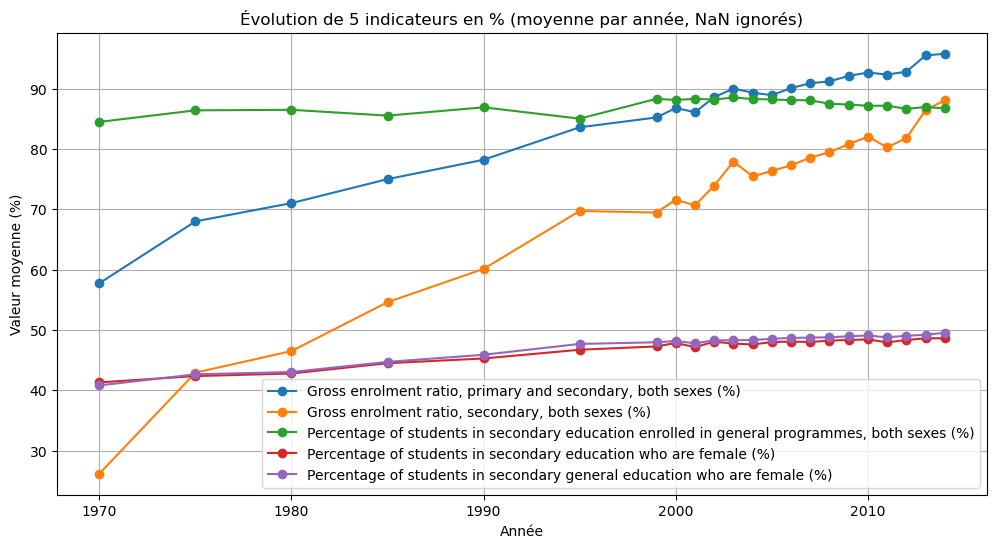

In [37]:
# 1️⃣ Sélection des 5 premiers indicateurs qui contiennent un '%'
indicateurs_exemple = (
    df_etape3['Indicator Name']
    .drop_duplicates()
    .loc[lambda s: s.str.contains("%", na=False)]
    .head(7)
    .tolist()
)

print("✅ Indicateurs sélectionnés :", indicateurs_exemple)

# 2️⃣ Filtrage du DataFrame pour ces indicateurs
df_plot = df_etape3[df_etape3['Indicator Name'].isin(indicateurs_exemple)]

# 3️⃣ Restructuration en long (année en ligne, valeur numérique)
df_melt_plot = df_plot.melt(
    id_vars=['Country Name', 'Indicator Name'],
    value_vars=annees_pertinentes,
    var_name='Year',
    value_name='Value'
)

# 4️⃣ Conversion en numérique
df_melt_plot['Year'] = df_melt_plot['Year'].astype(int)
df_melt_plot['Value'] = pd.to_numeric(df_melt_plot['Value'], errors='coerce')

# 5️⃣ Calcul d'une moyenne annuelle par indicateur
df_plot_mean = (
    df_melt_plot.groupby(['Indicator Name', 'Year'])['Value']
    .mean()
    .reset_index()
)

# 6️⃣ Tracé
plt.figure(figsize=(12,6))
for ind in indicateurs_exemple:
    subset = df_plot_mean[df_plot_mean['Indicator Name'] == ind]
    plt.plot(subset['Year'], subset['Value'], marker='o', label=ind)

plt.title("Évolution de 5 indicateurs en % (moyenne par année, NaN ignorés)")
plt.xlabel("Année")
plt.ylabel("Valeur moyenne (%)")
plt.legend()
plt.grid(True)
plt.show()


## le DataFrame en format **Pays × Indicateurs**

- Le DataFrame initial est au format **long** :  
  **(Pays, Indicateur, Année, Valeur)**  
- Nous voulons un format **large** :  
  **(Pays, Indicateur1, Indicateur2, …)**  
- Pour résumer les valeurs annuelles en une seule par pays et indicateur,  
  nous allons utiliser **`pivot_table()`** avec une **moyenne**.


In [38]:
# Conversion en format long pour utiliser pivot_table
df_long = df_etape3.melt(
    id_vars=['Country Name', 'Indicator Name'],
    value_vars=annees_pertinentes,
    var_name='Year',
    value_name='Value'
)

print("🔍 Aperçu du DataFrame au format long :")
display(df_long.head(10))

# Création du DataFrame final Pays × Indicateurs avec moyenne sur les années pertinentes
df_final_pays_indicateurs = df_long.pivot_table(
    index='Country Name',           # Chaque ligne = un pays
    columns='Indicator Name',       # Chaque colonne = un indicateur
    values='Value',                 # Valeur à agréger
    aggfunc='mean'                  # Agrégation par moyenne
)

# Réinitialiser les noms de colonnes pour plus de lisibilité
df_final_pays_indicateurs.reset_index(inplace=True)

print(f"📐 Dimensions du DataFrame final : {df_final_pays_indicateurs.shape}")
display(df_final_pays_indicateurs.head())


🔍 Aperçu du DataFrame au format long :


,Country Name,Indicator Name,Year,Value
0,Afghanistan,"Enrolment in secondary education, both sexes (number)",1970,116174.000000
1,Afghanistan,"Enrolment in secondary education, female (number)",1970,15253.000000
2,Afghanistan,"Enrolment in secondary general, both sexes (number)",1970,107609.000000
3,Afghanistan,"Enrolment in secondary general, female (number)",1970,14736.000000
4,Afghanistan,"Gross enrolment ratio, primary and secondary, both sexes (%)",1970,21.056530
5,Afghanistan,"Gross enrolment ratio, secondary, both sexes (%)",1970,8.331610
6,Afghanistan,Official entrance age to upper secondary education (years),1970,NaN
7,Afghanistan,"Percentage of students in secondary education enrolled in general programmes, both sexes (%)",1970,92.627441
8,Afghanistan,Percentage of students in secondary education who are female (%),1970,13.129440
9,Afghanistan,Percentage of students in secondary general education who are female (%),1970,13.694020


📐 Dimensions du DataFrame final : (207, 16)


Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in secondary education, female (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)","Gross enrolment ratio, primary and secondary, both sexes (%)","Gross enrolment ratio, secondary, both sexes (%)",Official entrance age to upper secondary education (years),"Percentage of students in secondary education enrolled in general programmes, both sexes (%)",Percentage of students in secondary education who are female (%),Percentage of students in secondary general education who are female (%),"School life expectancy, secondary, both sexes (years)",Theoretical duration of lower secondary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)"
0,Afghanistan,1.079254e+06,3.573802e+05,1.037173e+06,3.304755e+05,57.606950,30.117684,16.000,98.649010,25.062461,24.774296,1.812934,3.000000,6.000000,3.000000,5181.000000
1,Albania,3.849392e+05,1.829758e+05,3.448537e+05,1.673012e+05,88.987857,82.131877,14.375,90.480117,47.626819,48.916223,6.289535,4.000000,7.727273,3.727273,16392.133333
2,Algeria,3.110194e+06,1.532663e+06,3.035545e+06,1.534254e+06,85.326354,68.071932,15.125,92.201038,47.549589,48.925559,4.378260,3.545455,6.545455,3.000000,21476.733333
3,American Samoa,2.944000e+03,1.435250e+03,3.051400e+03,1.494000e+03,NaN,NaN,16.000,NaN,NaN,NaN,NaN,2.666667,NaN,2.000000,NaN
4,Andorra,3.647357e+03,1.786500e+03,3.383429e+03,1.659571e+03,46.198219,25.939560,16.000,93.150524,48.991564,49.057923,1.815770,4.000000,6.272727,2.272727,985.800000


### 📉 Évolution des pays aux plus faibles ratios avec interpolation

Dans cette étape, on cherche à **visualiser l’évolution de l’indicateur** :

**`Gross enrolment ratio, primary and secondary, both sexes (%)`**

pour **les 5 pays ayant les ratios moyens les plus faibles** sur l’ensemble des années pertinentes.

---

#### 🔹 Étapes principales

1. **Filtrage de l’indicateur**
   - On ne conserve que les lignes correspondant à l’indicateur cible dans `df_etape3`.

2. **Calcul de la moyenne par pays**
   - On calcule la moyenne de l’indicateur sur toutes les années pertinentes, en **ignorant les NaN**.
   - Cela permet d’identifier les pays avec la plus faible scolarisation moyenne.

3. **Sélection des 5 pays les plus faibles**
   - On trie par moyenne croissante pour garder uniquement les 5 premiers pays.

4. **Passage en format long**
   - Chaque ligne correspond à un triplet *(Pays, Année, Valeur)* pour faciliter la visualisation.

5. **Interpolation linéaire des valeurs manquantes**
   - Les données contiennent des `NaN` pour certaines années.
   - On utilise `interpolate(method='linear', limit_direction='both')` :
     - **Interpolation linéaire** : calcule les valeurs manquantes en reliant les points connus par une droite.
     - **`limit_direction='both'`** : 
       - Comble les trous **au milieu** des séries.
       - Extrapole aussi **au début et à la fin** si nécessaire à partir des premiers points connus.
   - Cela permet d’obtenir une **courbe continue**, même avec des années manquantes.

6. **Visualisation**
   - **Courbe continue** = série interpolée.
   - **Points** = valeurs réellement observées (NaN exclus).
   - On voit clairement les tendances tout en gardant la traçabilité des valeurs réelles.

---

#### 🔹 Intérêt de l’interpolation

- **Améliore la lisibilité** des courbes quand les données sont incomplètes.
- **Ne crée pas de nouvelles informations** : les points interpolés sont des estimations linéaires.
- **Permet d’identifier les tendances globales** même en présence de nombreuses valeurs manquantes.

---

Le résultat est un **graphe clair** montrant :
- Les pays aux **plus faibles ratios moyens**.
- L’évolution dans le temps avec **courbes continues**.
- Les **points réels visibles** pour distinguer les valeurs observées des valeurs interpolées.


🌍 10 pays aux ratios moyens les plus faibles : ['Somalia', 'South Sudan', 'Niger', 'Uganda', 'Haiti', 'Central African Republic', 'Tanzania', 'Chad', 'Burkina Faso', 'Mozambique']


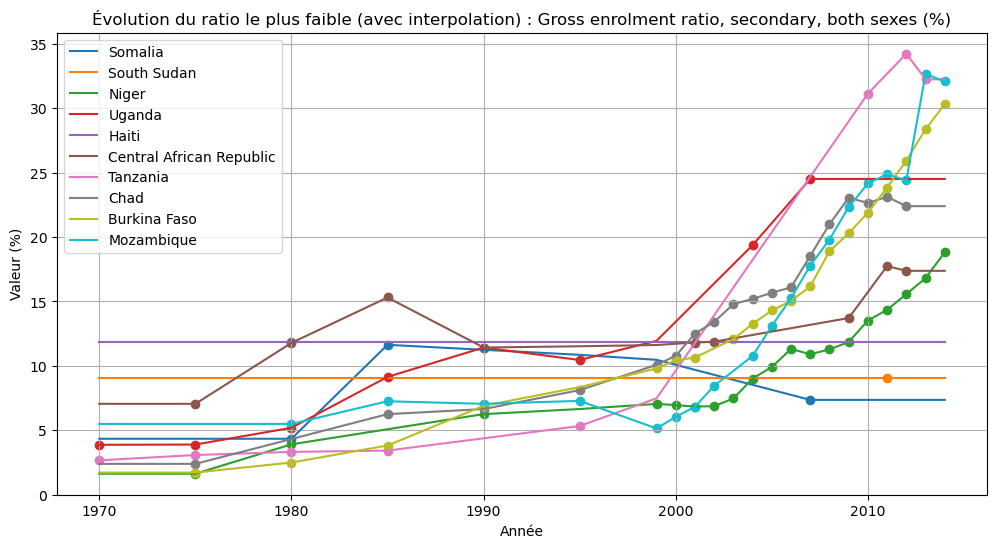

In [39]:


# 1️⃣ Indicateur cible
indicateur_cible = "Gross enrolment ratio, secondary, both sexes (%)"

# 2️⃣ Filtrage du DataFrame pour cet indicateur
df_ratio = df_etape3[df_etape3['Indicator Name'] == indicateur_cible].copy()

# 3️⃣ Calcul de la moyenne par pays (ignore les NaN)
df_ratio['moyenne'] = df_ratio[annees_pertinentes].mean(axis=1, skipna=True)

# 4️⃣ Sélection des 10 pays avec ratio moyen le plus faible
dix_pays_faibles = df_ratio.sort_values('moyenne', ascending=True).head(10)['Country Name'].tolist()
print("🌍 10 pays aux ratios moyens les plus faibles :", dix_pays_faibles)

# 5️⃣ Préparation pour le tracé avec interpolation
df_plot = df_ratio[df_ratio['Country Name'].isin(dix_pays_faibles)].copy()
df_plot_long = df_plot.melt(
    id_vars=['Country Name'],
    value_vars=annees_pertinentes,
    var_name='Year',
    value_name='Value'
)
df_plot_long['Year'] = df_plot_long['Year'].astype(int)
df_plot_long['Value'] = pd.to_numeric(df_plot_long['Value'], errors='coerce')

# 6️⃣ Interpolation linéaire des NaN pour chaque pays
df_plot_long = df_plot_long.sort_values(['Country Name', 'Year'])
df_plot_long['Value_interp'] = df_plot_long.groupby('Country Name')['Value']\
                                          .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))

# 7️⃣ Tracé avec les courbes continues
plt.figure(figsize=(12, 6))
for pays in dix_pays_faibles:
    subset = df_plot_long[df_plot_long['Country Name'] == pays]
    plt.plot(subset['Year'], subset['Value_interp'], label=pays)       # Courbe interpolée
    plt.scatter(subset['Year'], subset['Value'], marker='o')           # Points réels

plt.title(f"Évolution du ratio le plus faible (avec interpolation) : {indicateur_cible}")
plt.xlabel("Année")
plt.ylabel("Valeur (%)")
plt.legend()
plt.grid(True)
plt.show()


🌍 10 pays aux ratios moyens les plus faibles : ['Somalia', 'Niger', 'Haiti', 'Mozambique', 'Zambia', 'Tanzania', 'Central African Republic', 'Guinea-Bissau', 'Papua New Guinea', 'Chad']


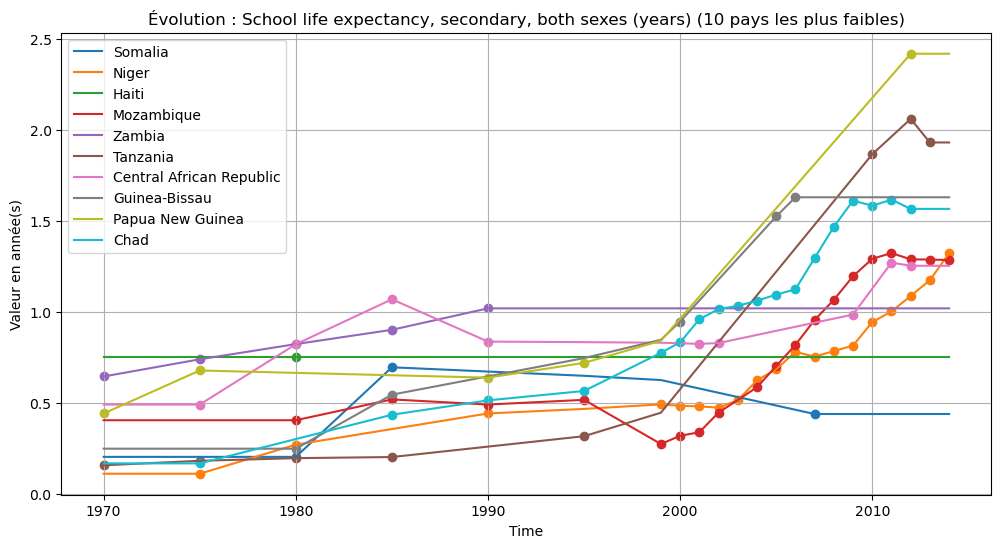

In [40]:

# 1️⃣ Indicateur cible
indicateur_cible = "School life expectancy, secondary, both sexes (years)"

# 2️⃣ Filtrage pour cet indicateur
df_ratio = df_etape3[df_etape3['Indicator Name'] == indicateur_cible].copy()

# 3️⃣ Calcul de la moyenne par pays (ignore NaN)
df_ratio['moyenne'] = df_ratio[annees_pertinentes].mean(axis=1, skipna=True)

# 4️⃣ Sélection des 10 pays avec le ratio moyen le plus faible
dix_pays_faibles = df_ratio.sort_values('moyenne', ascending=True).head(10)['Country Name'].tolist()
print("🌍 10 pays aux ratios moyens les plus faibles :", dix_pays_faibles)

# 5️⃣ Préparation pour le tracé avec interpolation
df_plot = df_ratio[df_ratio['Country Name'].isin(dix_pays_faibles)].copy()
df_plot_long = df_plot.melt(
    id_vars=['Country Name'],
    value_vars=annees_pertinentes,
    var_name='Year',
    value_name='Value'
)
df_plot_long['Year'] = df_plot_long['Year'].astype(int)
df_plot_long['Value'] = pd.to_numeric(df_plot_long['Value'], errors='coerce')

# 6️⃣ Interpolation linéaire des NaN pour chaque pays
df_plot_long = df_plot_long.sort_values(['Country Name', 'Year'])
df_plot_long['Value_interp'] = df_plot_long.groupby('Country Name')['Value']\
                                          .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))

# 7️⃣ Tracé avec courbes interpolées + points réels
plt.figure(figsize=(12, 6))
for pays in dix_pays_faibles:
    subset = df_plot_long[df_plot_long['Country Name'] == pays]
    # Courbe interpolée
    plt.plot(subset['Year'], subset['Value_interp'], label=pays)
    # Points réels
    plt.scatter(subset['Year'], subset['Value'], marker='o')

plt.title(f"Évolution : {indicateur_cible} (10 pays les plus faibles)")
plt.xlabel("Time")
plt.ylabel("Valeur en année(s)")
plt.legend()
plt.grid(True)
plt.show()


# Étape 4 : Identifiez les indicateurs redondants d'un point de vue statistique

## 📊 Résultats attendus

- Un **DataFrame** où :
  - Chaque **ligne** correspond à un **pays**.
  - Chaque **colonne** correspond à un **indicateur**.
- Seuls des **indicateurs faiblement corrélés** entre eux doivent être conservés  
  *(moins de 70 % en valeur absolue du coefficient de corrélation choisi)*.

---

## 📝 Instructions

1. **Calculer une matrice de corrélation** entre l’ensemble des indicateurs en utilisant :
   - La méthode **Pearson**.
   - La méthode **Spearman**.  

2. **Visualiser les résultats** à l’aide d’une **heatmap**.

3. **Supprimer les indicateurs excessivement corrélés** (donc redondants).

---

## 💡 Recommandations

- Utiliser la méthode `corr()` de **Pandas** pour calculer directement la matrice.
- Utiliser la fonction `heatmap()` de la librairie **Seaborn** pour visualiser les corrélations.
- Bien comprendre les **limites** des coefficients de corrélation de Pearson et Spearman :
  - Quand **ne peut-on pas** les utiliser ?
  - **Ce qu’ils indiquent** et **ce qu’ils n’indiquent pas**.
- Lorsqu’on a deux indicateurs très corrélés, conserver **celui le plus pertinent** vis-à-vis de la **problématique métier**.
- Si vous êtes déjà à l’aise avec ce type d’analyse, utiliser `pairplot()` de **Seaborn** pour une vision plus détaillée des relations entre indicateurs.

---

## ⚠️ Points de vigilance

- Si un indicateur n’est **pas renseigné** pour un pays :
  - La matrice de corrélation **ignorera automatiquement** ce pays.
  - Cela réduit la **quantité de données** utilisée pour les calculs.
  - Et cela peut **biaiser les résultats**.
- Assurez-vous donc d’avoir **bien géré les valeurs manquantes** avant cette étape.


In [41]:
# ============================================================
# Étape 4 — Matrices de corrélation & sélection d’indicateurs
# ============================================================

# ON repart de la matrice (pays x indicateurs) obtenu dans les précédentes étapes
if 'Country Name' in df_final_pays_indicateurs.columns:
    indicators_df = df_final_pays_indicateurs.set_index('Country Name').copy()
else:
    indicators_df = df_final_pays_indicateurs.copy()

# Forcer en numérique (au cas où) et enlever les colonnes vides
indicators_df = indicators_df.apply(pd.to_numeric, errors='coerce')
indicators_df = indicators_df.dropna(axis=1, how='all')

print(f"🔎 Dimensions initiales (pays x indicateurs) : {indicators_df.shape}")
#print("📉 Taux de valeurs manquantes par indicateur (top 10) :")
#display(
#    indicators_df.isna().mean().sort_values(ascending=False).head(10).to_frame('missing_rate')
#)



🔎 Dimensions initiales (pays x indicateurs) : (207, 15)


✅ Matrices de corrélation calculées (Pearson & Spearman).


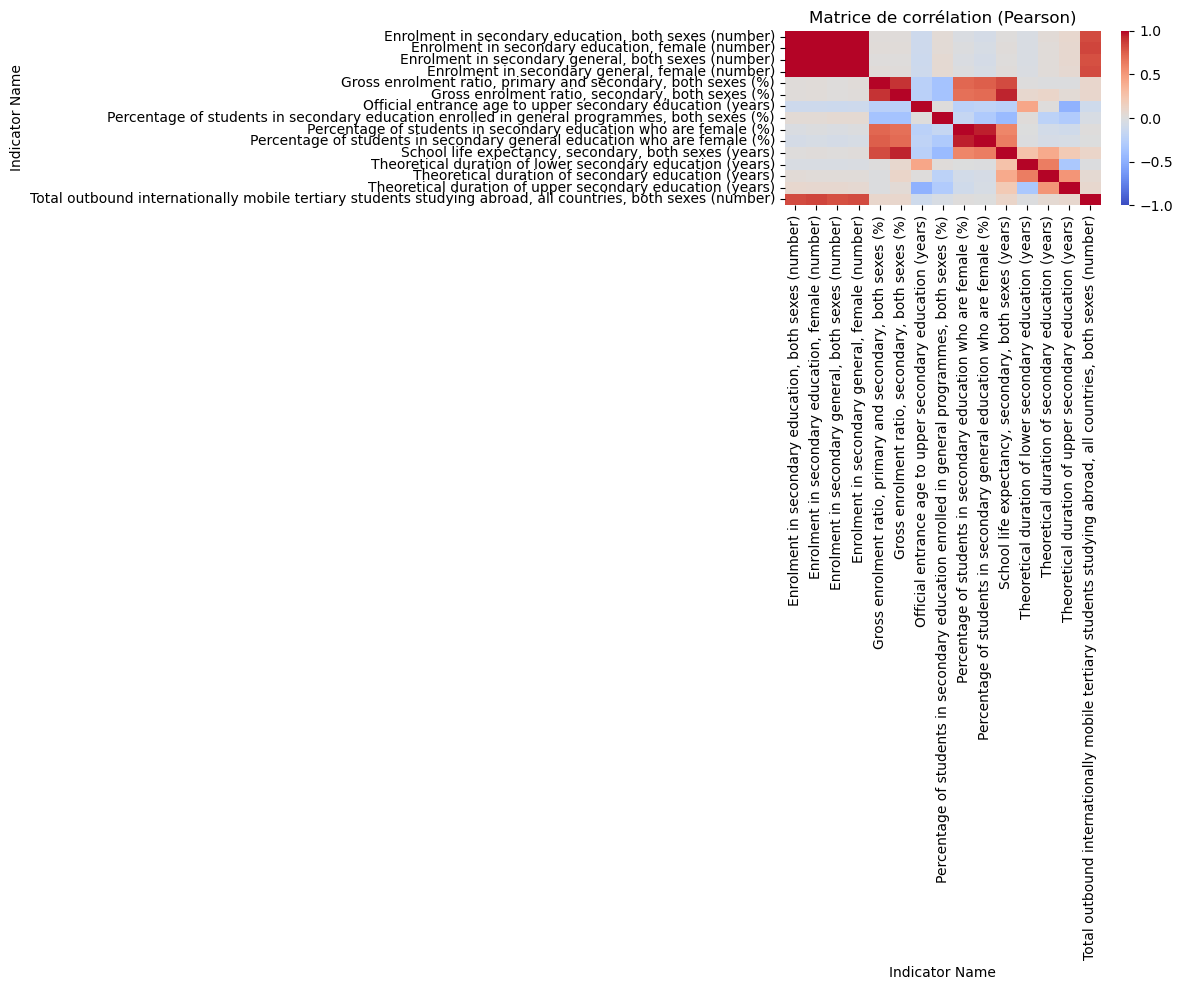

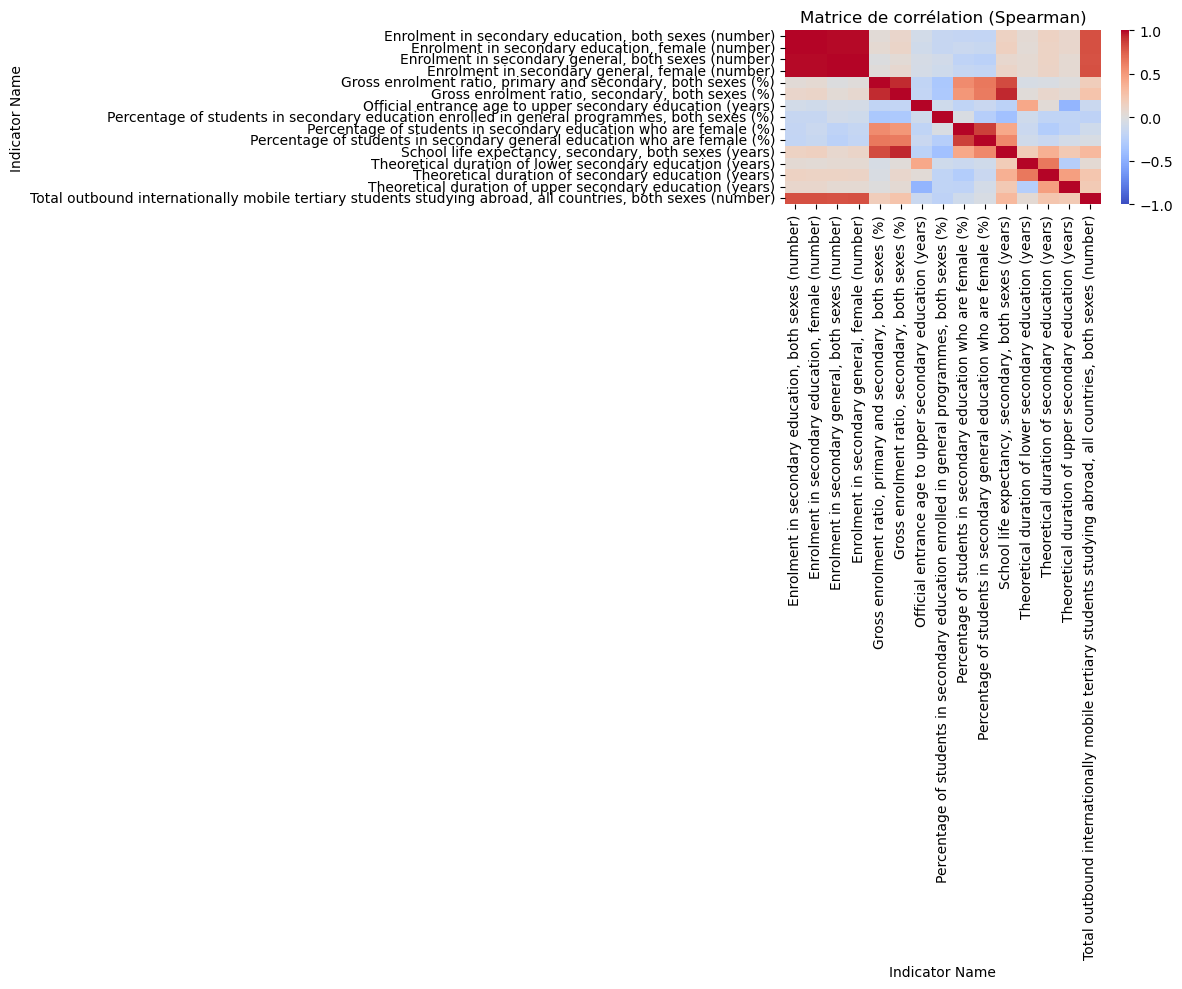

In [42]:
# ---------------------------------------------------------
# 1) Matrices de corrélation Pearson et Spearman (pairwise)
# ---------------------------------------------------------
corr_pearson = indicators_df.corr(method='pearson', min_periods=10)
corr_spearman = indicators_df.corr(method='spearman', min_periods=10)

print("✅ Matrices de corrélation calculées (Pearson & Spearman).")

# --------------------------------
# 2) Visualisations (heatmaps)
# --------------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pearson, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Matrice de corrélation (Pearson)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Matrice de corrélation (Spearman)")
plt.tight_layout()
plt.show()



In [43]:


# ===============================
# 1) Corrélations & comparaison
# ===============================
def compute_correlations(df, min_periods=10):
    corr_pearson = df.corr(method='pearson', min_periods=min_periods)
    corr_spearman = df.corr(method='spearman', min_periods=min_periods)
    return corr_pearson, corr_spearman

def compare_corr_matrices(corr_p, corr_s):
    # Différences absolues élément par élément
    diff = (corr_p - corr_s).abs()
    # Stats globales
    mean_abs_diff = diff.to_numpy(np.float64)
    mean_abs_diff = np.nanmean(mean_abs_diff)

    max_abs_diff = np.nanmax(diff.to_numpy(np.float64))
    # Top paires les plus différentes
    tri = diff.where(~np.eye(len(diff), dtype=bool)).stack().sort_values(ascending=False)
    top_pairs = tri.head(10)
    return diff, mean_abs_diff, max_abs_diff, top_pairs

# ==========================================
# 2) Détection de fortes corrélations (|r|)
# ==========================================
def find_highly_correlated(df, method='pearson', threshold=0.9, min_periods=10):
    corr = df.corr(method=method, min_periods=min_periods)
    # On parcourt le triangle supérieur pour éviter les doublons
    to_check = []
    cols = corr.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            r = corr.iat[i, j]
            if pd.notna(r) and abs(r) >= threshold:
                to_check.append((cols[i], cols[j], r))
    # Tri par corrélation décroissante en valeur absolue
    to_check.sort(key=lambda x: abs(x[2]), reverse=True)
    return corr, to_check

# ===================================================================
# 3) Sélection d’un set de variables "représentatives" (à conserver)
#    -> Greedy : si (A,B) est très corrélé, on en garde 1 selon un
#       critère (variance max par défaut, sinon moins de NaNs)
# ===================================================================
def choose_representatives(df, pairs, prefer='variance'):
    # Construire un graphe d’adjacence des paires corrélées
    neighbors = {c: set() for c in df.columns}
    for a, b, _ in pairs:
        neighbors[a].add(b)
        neighbors[b].add(a)

    # Score de préférence : plus grand = à garder
    if prefer == 'variance':
        score = df.var(numeric_only=True).to_dict()
    elif prefer == 'completeness':
        # proportion de valeurs non-nulles
        score = (1 - df.isna().mean()).to_dict()
    else:
        raise ValueError("prefer doit être 'variance' ou 'completeness'")

    kept = set(df.columns)     # candidates restantes
    dropped = set()

    # On traite les composantes corrélées
    # Heuristique : trier les variables par score décroissant et garder les meilleures,
    # en éliminant leurs voisins très corrélés
    for var in sorted(df.columns, key=lambda c: score.get(c, -np.inf), reverse=True):
        if var not in kept:
            continue
        # Garder 'var' et supprimer ses voisins
        for neigh in list(neighbors[var]):
            if neigh in kept:
                kept.remove(neigh)
                dropped.add(neigh)
        # On garde 'var' (ne pas le retirer)
    return sorted(kept), sorted(dropped)

# ===============================
# 4) Exemple d’utilisation
# ===============================
# Ajustons les paramètres si besoin :
threshold = 0.9
min_periods = 10

corr_p, corr_s = compute_correlations(indicators_df, min_periods=min_periods)
diff, mad, mx, top_pairs = compare_corr_matrices(corr_p, corr_s)

print("✅ Corrélations calculées (Pearson & Spearman).")
print(f"Différence moyenne absolue entre matrices : {mad:.4f}")
print(f"Différence maximale absolue entre matrices : {mx:.4f}")
print("Top paires où Pearson vs Spearman diffèrent le plus :")
print(top_pairs)

# Détection des paires très corrélées (choisissez la métrique : 'pearson' ou 'spearman')
corr_used, strong_pairs = find_highly_correlated(
    indicators_df, method='pearson', threshold=threshold, min_periods=min_periods
)

print(f"\n📌 Paires avec |r| ≥ {threshold} ({len(strong_pairs)} trouvées) :")
for a, b, r in strong_pairs[:20]:
    print(f" - {a} ~ {b} : r = {r:.3f}")
if len(strong_pairs) > 20:
    print(f" ... et {len(strong_pairs)-20} autres.")

# Choix des variables à conserver/supprimer
kept, dropped = choose_representatives(
    indicators_df, strong_pairs, prefer='variance'   # ou 'completeness'
)
print(f"\nVariables à CONSERVER ({len(kept)}) : {kept}")
print(f"Variables à SUPPRIMER ({len(dropped)}) : {dropped}")


✅ Corrélations calculées (Pearson & Spearman).
Différence moyenne absolue entre matrices : 0.0685
Différence maximale absolue entre matrices : 0.2256
Top paires où Pearson vs Spearman diffèrent le plus :
Indicator Name                                                                                               Indicator Name                                                                                             
School life expectancy, secondary, both sexes (years)                                                        Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)    0.225581
Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)  School life expectancy, secondary, both sexes (years)                                                          0.225581
Enrolment in secondary education, female (number)                                                            Percentage o

Variables CONSERVÉES (8): ['Enrolment in secondary education, both sexes (number)', 'Gross enrolment ratio, secondary, both sexes (%)', 'Official entrance age to upper secondary education (years)', 'Percentage of students in secondary education enrolled in general programmes, both sexes (%)', 'Percentage of students in secondary education who are female (%)', 'Theoretical duration of lower secondary education (years)', 'Theoretical duration of secondary education (years)', 'Theoretical duration of upper secondary education (years)']
Variables SUPPRIMÉES (7): ['Enrolment in secondary education, female (number)', 'Enrolment in secondary general, both sexes (number)', 'Enrolment in secondary general, female (number)', 'Gross enrolment ratio, primary and secondary, both sexes (%)', 'Percentage of students in secondary general education who are female (%)', 'School life expectancy, secondary, both sexes (years)', 'Total outbound internationally mobile tertiary students studying abroad, all 

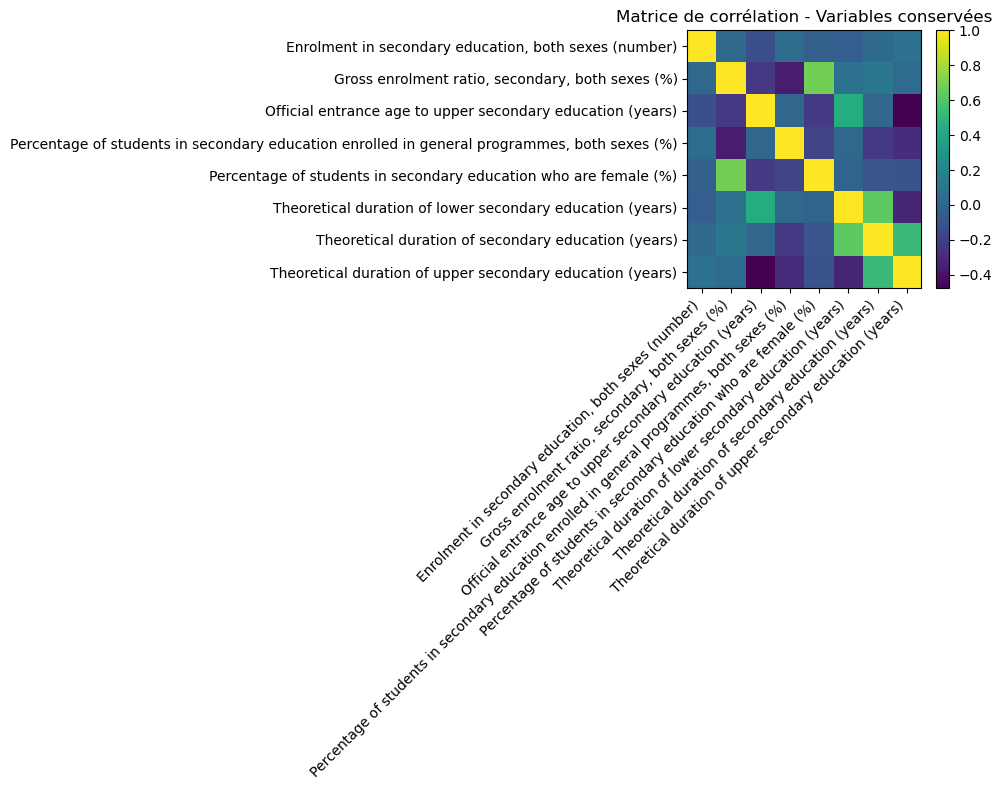

In [44]:


# --- 1) Détection des paires très corrélées ---
def find_highly_correlated(df, method='pearson', threshold=0.9, min_periods=10):
    corr = df.corr(method=method, min_periods=min_periods)
    pairs = []
    cols = corr.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            r = corr.iat[i, j]
            if pd.notna(r) and abs(r) >= threshold:
                pairs.append((cols[i], cols[j], r))
    pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    return corr, pairs

# --- 2) Choix des variables représentatives ---
def choose_representatives(df, pairs, prefer='variance'):
    # Graphe des liens (variables trop corrélées)
    neighbors = {c: set() for c in df.columns}
    for a, b, _ in pairs:
        neighbors[a].add(b)
        neighbors[b].add(a)

    # Score pour départager (variance par défaut, sinon complétude)
    if prefer == 'variance':
        score = df.var(numeric_only=True).to_dict()
    elif prefer == 'completeness':
        score = (1 - df.isna().mean()).to_dict()
    else:
        raise ValueError("prefer doit être 'variance' ou 'completeness'")

    kept = set(df.columns)
    dropped = set()

    # Heuristique gloutonne : on garde la variable au meilleur score
    # et on écarte ses voisines très corrélées
    for var in sorted(df.columns, key=lambda c: score.get(c, -np.inf), reverse=True):
        if var not in kept:
            continue
        for neigh in list(neighbors[var]):
            if neigh in kept:
                kept.remove(neigh)
                dropped.add(neigh)

    return sorted(kept), sorted(dropped)

# --- 3) Application : filtrage + heatmap ---
threshold = 0.7          # à ajuster selon le besoin
min_periods = 10
method = 'pearson'       # ou 'spearman' pour la sélection

# a) trouver les paires très corrélées
_, strong_pairs = find_highly_correlated(
    indicators_df, method=method, threshold=threshold, min_periods=min_periods
)

# b) choisir les variables à conserver
kept, dropped = choose_representatives(indicators_df, strong_pairs, prefer='variance')

print(f"Variables CONSERVÉES ({len(kept)}): {kept}")
print(f"Variables SUPPRIMÉES ({len(dropped)}): {dropped}")

# c) DataFrame réduit et matrice de corrélation finale (Pearson par défaut)
reduced_df = indicators_df[kept].copy()
final_corr = reduced_df.corr(method='pearson', min_periods=min_periods)

# d) Heatmap (matplotlib uniquement, pas de style/couleurs imposés)
plt.figure(figsize=(10, 8))
plt.imshow(final_corr, interpolation='nearest', aspect='auto')
plt.title("Matrice de corrélation - Variables conservées")
plt.colorbar()
tick_marks = np.arange(len(final_corr.columns))
plt.xticks(tick_marks, final_corr.columns, rotation=45, ha='right')
plt.yticks(tick_marks, final_corr.columns)
plt.tight_layout()
plt.show()

C:\Users\karap\AppData\Local\Temp\ipykernel_5148\1870603234.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


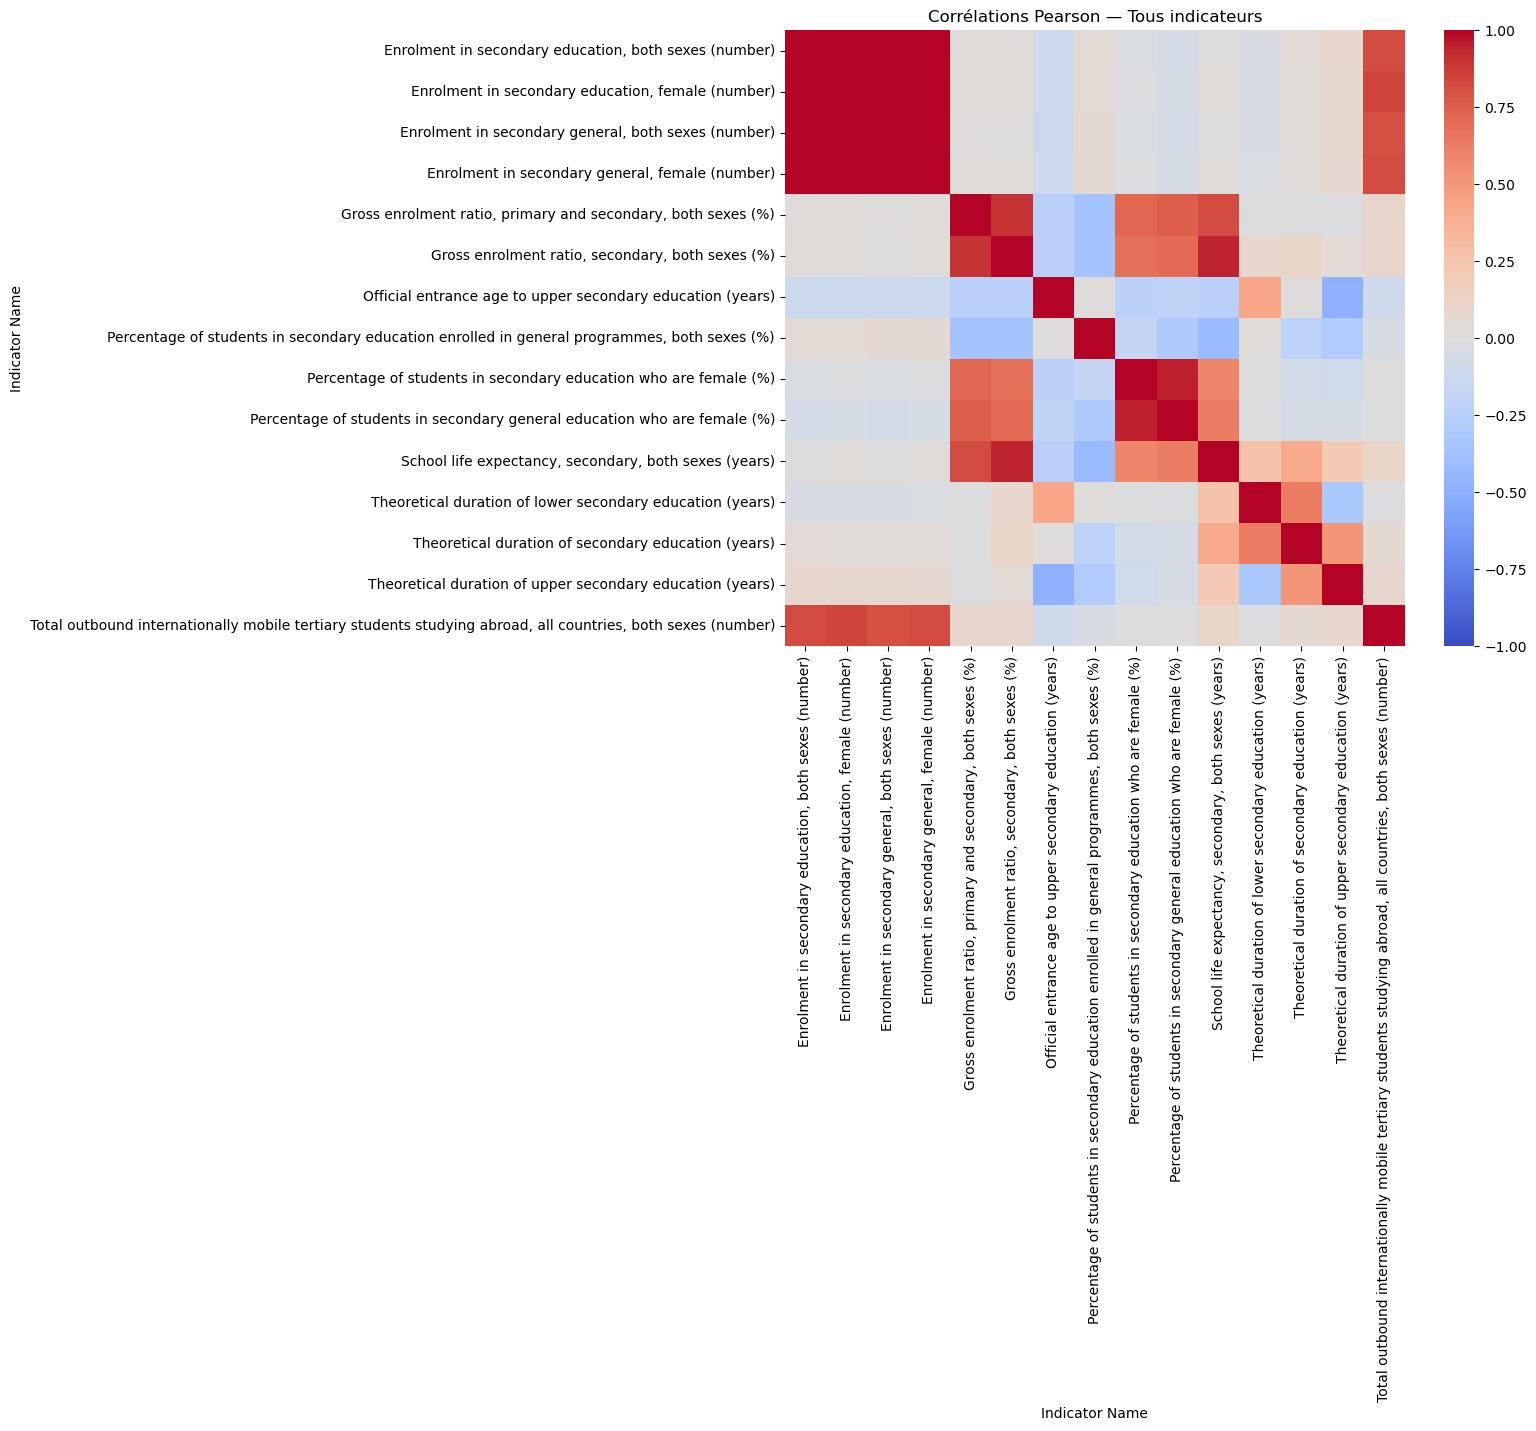

🧹 Indicateurs supprimés pour redondance (|corr| ≥ 0.7) : 8
  • Enrolment in secondary education, female (number)
  • Enrolment in secondary general, both sexes (number)
  • Enrolment in secondary general, female (number)
  • Gross enrolment ratio, primary and secondary, both sexes (%)
  • Gross enrolment ratio, secondary, both sexes (%)
  • Percentage of students in secondary education who are female (%)
  • School life expectancy, secondary, both sexes (years)
  • Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)
✅ Dimensions après filtrage : (207, 7)
🔧 Proportion de corrélations fortes restantes (vérification rapide) :
  → 0.00% de paires ≥ 0.7 (doit être proche de 0%)


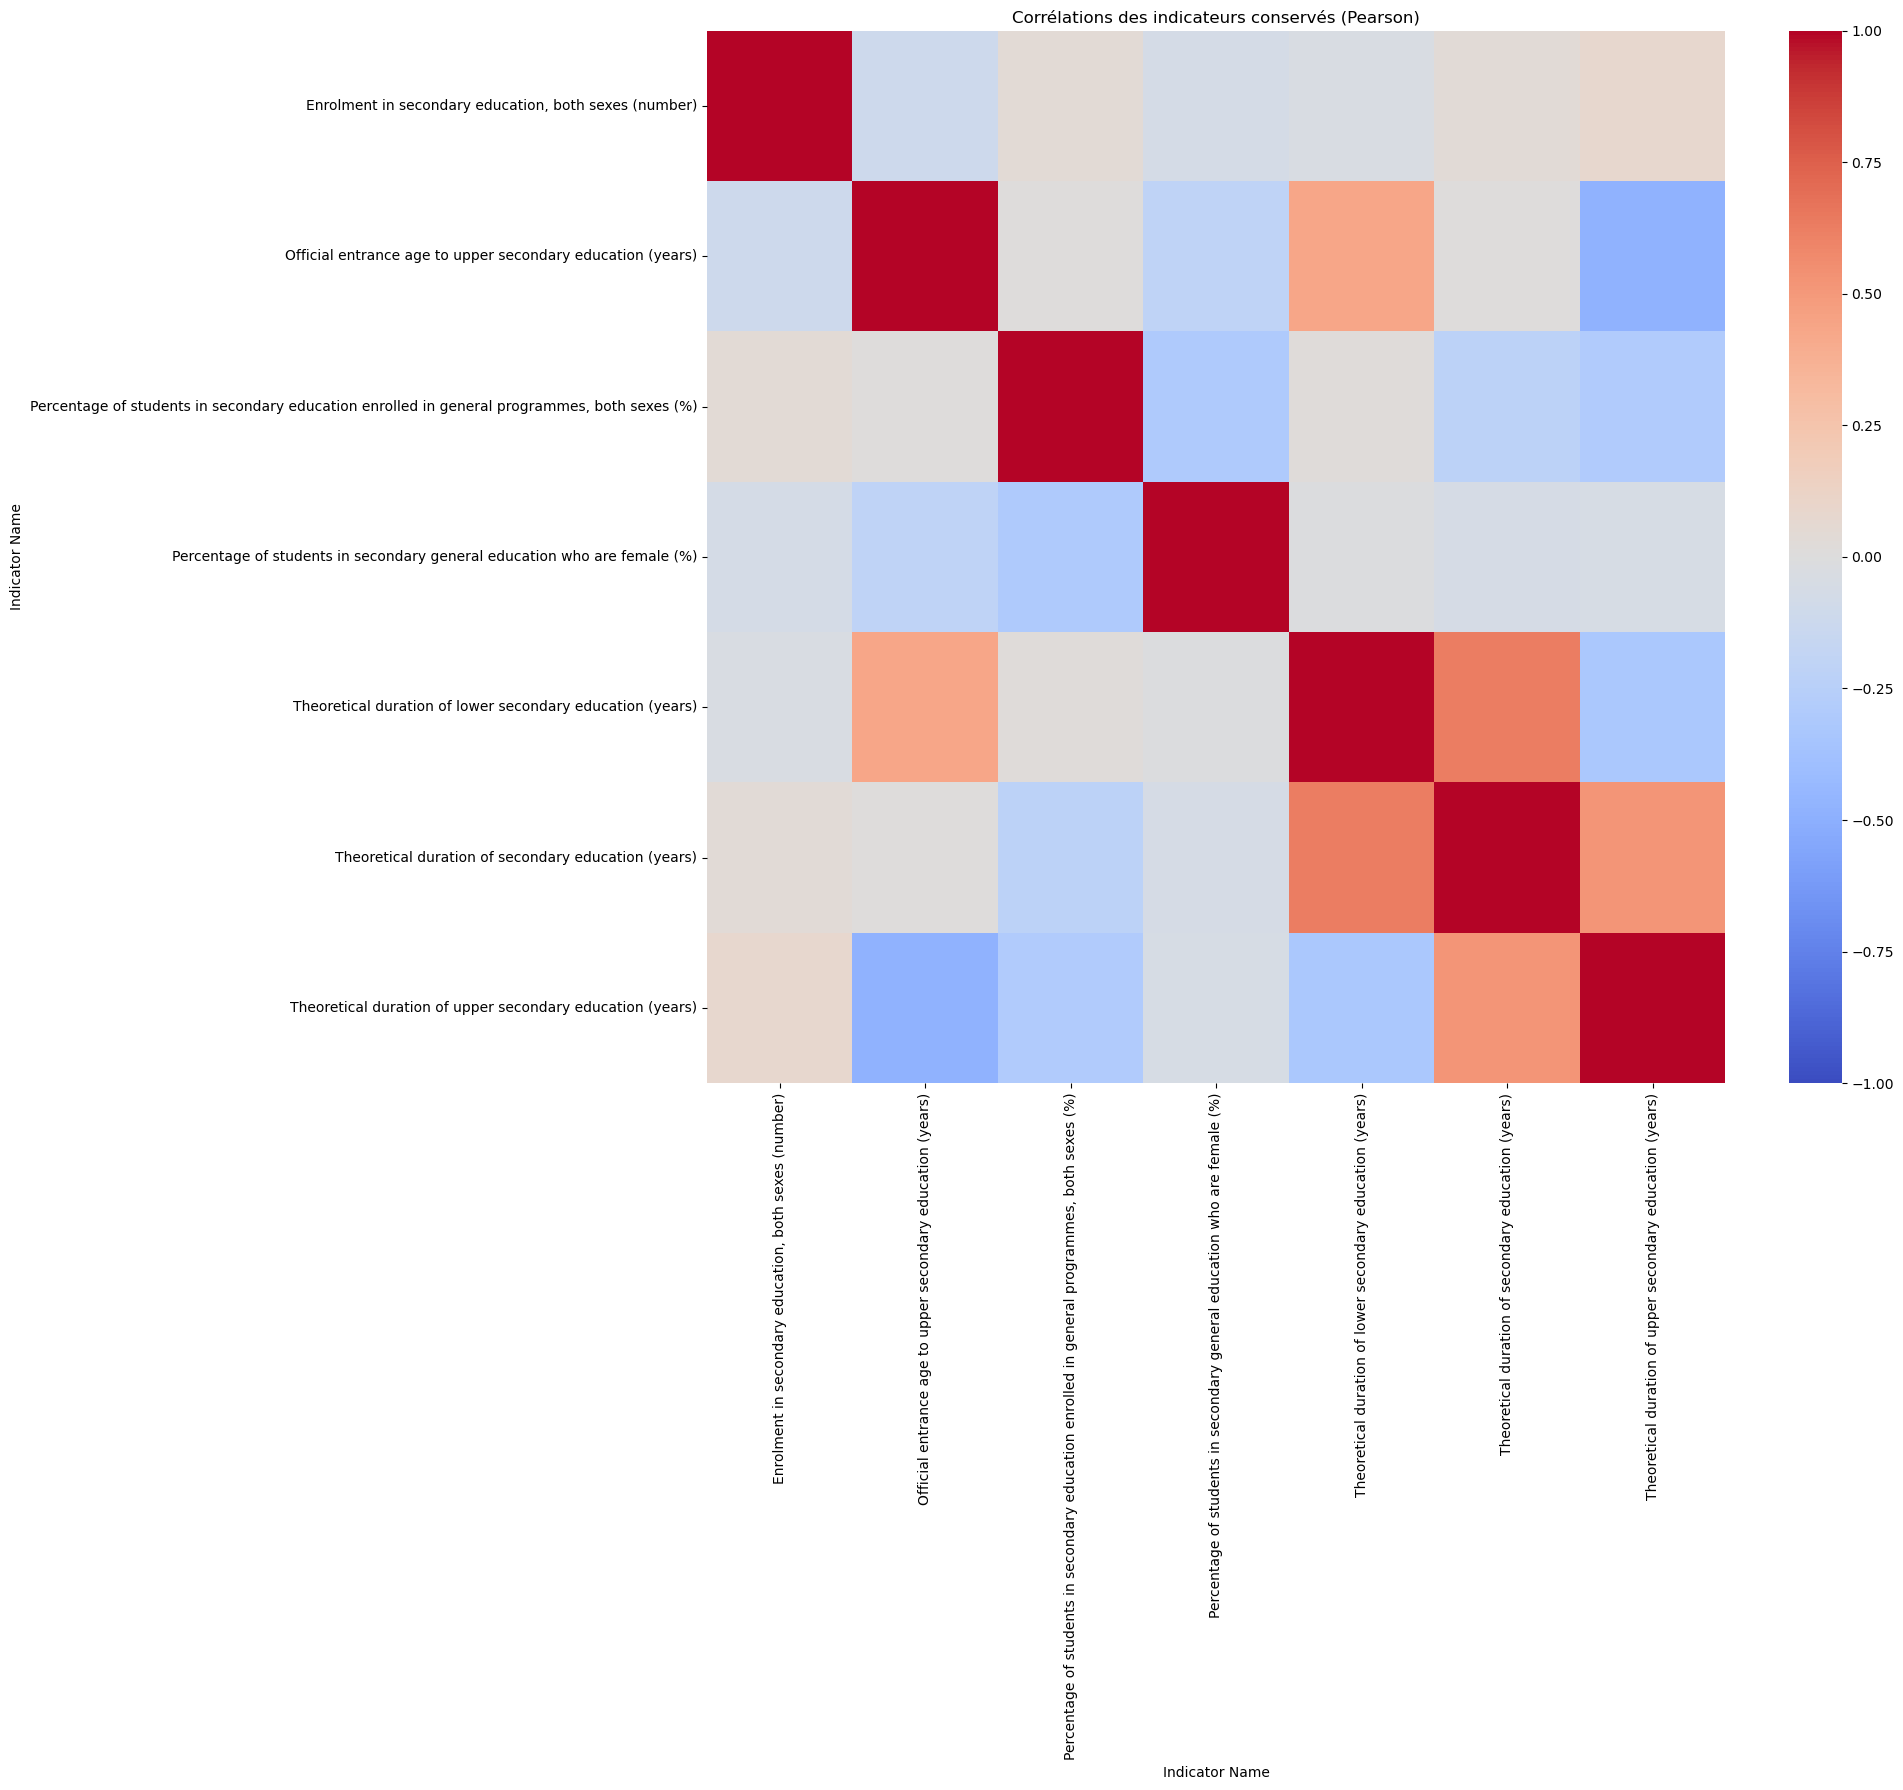

In [45]:
# ---------------------------------------------------------
# Suppression des indicateurs trop corrélés (|corr| >= T)
# ---------------------------------------------------------

# ==========================================
# 📌 Recalcul de la matrice de corrélation Pearson
# ==========================================
corr_pearson = indicators_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Corrélations Pearson — Tous indicateurs")
plt.tight_layout()
plt.show()

THRESHOLD = 0.70  # <— conforme aux attendus

# Règle de décision pour choisir lequel conserver :
#   1) Garder l’indicateur avec le MOINS de valeurs manquantes
#   2) En cas d’égalité, garder celui avec la plus GRANDE variance (plus informatif)
#   3) En cas d’égalité, garder celui au nom le plus court (décision neutre)

missing_counts = indicators_df.isna().sum()
variances = indicators_df.var(skipna=True)

to_drop = set()
to_keep = set(indicators_df.columns)

cols = indicators_df.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        c1, c2 = cols[i], cols[j]
        r = corr_pearson.loc[c1, c2]
        if pd.notna(r) and abs(r) >= THRESHOLD:
            # Comparer selon la règle ci-dessus
            a, b = c1, c2
            # 1) moins de NA
            if missing_counts[a] != missing_counts[b]:
                keep = a if missing_counts[a] < missing_counts[b] else b
            # 2) plus grande variance
            elif variances[a] != variances[b]:
                keep = a if variances[a] > variances[b] else b
            # 3) nom le plus court
            else:
                keep = a if len(a) <= len(b) else b

            drop = b if keep == a else a
            # Ne marque à supprimer que si ni déjà supprimé ni déjà décidé de garder l'autre
            if drop in to_keep:
                to_drop.add(drop)
                to_keep.discard(drop)

to_drop = sorted(list(to_drop))
kept = [c for c in indicators_df.columns if c not in to_drop]

print(f"🧹 Indicateurs supprimés pour redondance (|corr| ≥ {THRESHOLD}) : {len(to_drop)}")
for c in to_drop[:20]:
    print("  •", c)
if len(to_drop) > 20:
    print(f"  ... et {len(to_drop)-20} de plus")

# DataFrame final, faiblement corrélé
df_indicateurs_peu_corr = indicators_df[kept].copy()

print(f"✅ Dimensions après filtrage : {df_indicateurs_peu_corr.shape}")
print("🔧 Proportion de corrélations fortes restantes (vérification rapide) :")

# Vérification : part des corrélations restantes au-dessus du seuil (hors diagonale)
corr_check = df_indicateurs_peu_corr.corr(method='pearson')
mask = ~np.eye(len(corr_check), dtype=bool)
prop_fortes = (abs(corr_check.values[mask]) >= THRESHOLD).mean()
print(f"  → {prop_fortes:.2%} de paires ≥ {THRESHOLD} (doit être proche de 0%)")

# Heatmap finale 
plt.figure(figsize=(20, 18))
sns.heatmap(df_indicateurs_peu_corr.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Corrélations des indicateurs conservés (Pearson)")
plt.tight_layout()
plt.show()




In [46]:
# ==========================================
# 📌 Liste finale des indicateurs retenus & couverture par pays
# ==========================================

# Nombre de pays renseignés par indicateur = nb de valeurs non-NaN
nb_pays_par_indic = df_indicateurs_peu_corr.notna().sum().sort_values(ascending=False)

# Construire un DataFrame pour lecture claire
df_resume_indicateurs = pd.DataFrame({
    "Indicateur": nb_pays_par_indic.index,
    "Nb_pays_renseignés": nb_pays_par_indic.values
})

print(f"📊 Nombre total d'indicateurs conservés : {len(df_resume_indicateurs)}")
display(df_resume_indicateurs.head(7))  # aperçu des 20 premiers


📊 Nombre total d'indicateurs conservés : 7


,Indicateur,Nb_pays_renseignés
0,"Enrolment in secondary education, both sexes (number)",207
1,Theoretical duration of lower secondary education (years),206
2,Theoretical duration of upper secondary education (years),206
3,Official entrance age to upper secondary education (years),205
4,Percentage of students in secondary general education who are female (%),202
5,Theoretical duration of secondary education (years),202
6,"Percentage of students in secondary education enrolled in general programmes, both sexes (%)",200


# Étape 5 : Analysez vos indicateurs restants et formulez une liste de pays pertients pour l'implantation d'academy

## 📌 Résultats attendus

- Un **DataFrame** où :
  - une ligne = un pays  
  - une colonne = un indicateur  
  - seuls des **indicateurs faiblement corrélés** entre eux doivent être présents.

- La **liste pertinente de pays** selon vos analyses pour répondre à la demande de Mark  
  *(au format liste Python ou DataFrame)*.

- **Code + Markdown** pour reproduire les analyses décrites dans les instructions ci-dessous.

---

## 📝 Instructions

1. Choisissez un indicateur (celui que vous voulez) et :
   - calculez ses **statistiques descriptives basiques**
   - tracez sa **distribution**

2. Réécrivez le code ci-dessus dans une **fonction**, et appliquez-la à **l’ensemble des autres indicateurs** via une boucle `for`.

3. **Interprétez** la distribution pour chaque indicateur.

4. Proposez une **méthode quantitative**, sur la base des indicateurs, pour sélectionner des pays et répondre à la demande de Mark.

---

## 💡 Recommandations

- Utilisez :
  - `describe()` de **Pandas** pour calculer les statistiques descriptives.
  - `displot()` de **Seaborn** pour visualiser clairement les distributions des indicateurs.

- Comprenez chaque ligne du `describe()`  
  *(en particulier les quantiles, qui aident à interpréter la distribution de l’indicateur)*.

- Si vos graphiques sont trop petits, configurez leur taille avec :
  ```python
  plt.figure(figsize=(largeur, hauteur))


,Theoretical duration of secondary education (years)
count,202.000000
mean,6.358123
std,0.856167
min,4.000000
25%,6.000000
50%,6.136364
75%,7.000000
max,9.000000


c:\Users\karap\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


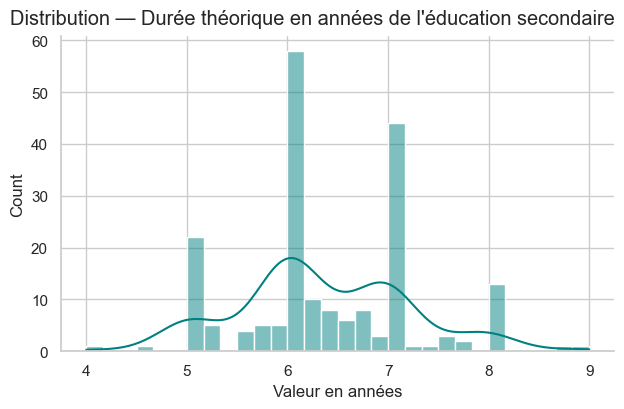

In [47]:


# Nom exact de l’indicateur choisi
indic_exemple = "Theoretical duration of secondary education (years)"
indic_exemple_fr = "Durée théorique en années de l'éducation secondaire"

# Récupération de la série (en gérant l’index pays)
if 'Country Name' in df_indicateurs_peu_corr.columns:
    s = df_indicateurs_peu_corr.set_index('Country Name')[indic_exemple].astype(float)
else:
    s = df_indicateurs_peu_corr[indic_exemple].astype(float)
    
# Statistiques descriptives
stats_indic = s.describe()  # count, mean, std, min, 25%, 50%, 75%, max
display(stats_indic.to_frame(name=indic_exemple))

# Distribution
sns.set_theme(style="whitegrid")
g = sns.displot(s.dropna(), bins=30, kde=True, height=4, aspect=1.6, color="teal")
g.fig.suptitle(f"Distribution — {indic_exemple_fr}", y=1.02)
plt.xlabel("Valeur en années")
plt.show()


,Theoretical duration of secondary education (years)
count,202.000000
mean,6.358123
std,0.856167
min,4.000000
25%,6.000000
50%,6.136364
75%,7.000000
max,9.000000


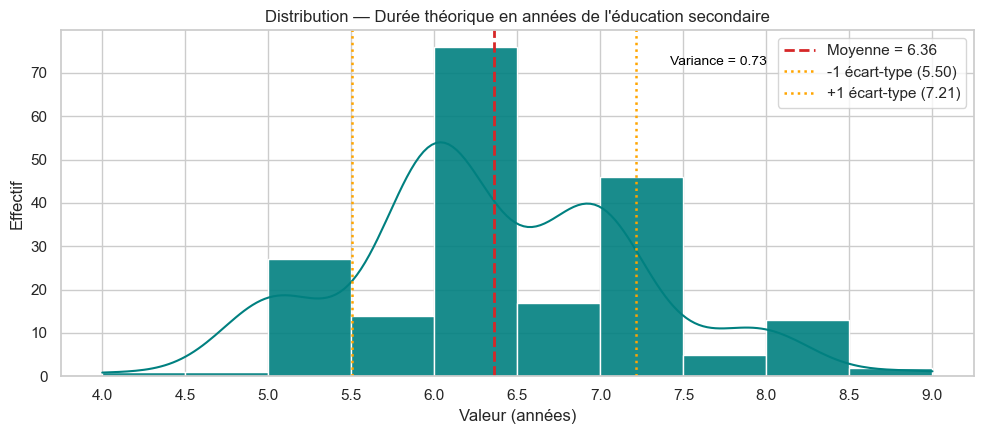

In [48]:
# --- Paramétrage ---
indic_exemple = "Theoretical duration of secondary education (years)"
indic_exemple_fr = "Durée théorique en années de l'éducation secondaire"

# Série (index = pays si dispo)
if 'Country Name' in df_indicateurs_peu_corr.columns:
    s = df_indicateurs_peu_corr.set_index('Country Name')[indic_exemple].astype(float)
else:
    s = df_indicateurs_peu_corr[indic_exemple].astype(float)

# Stats descriptives
stats_indic = s.describe()
variance_val = s.var()
mean_val = s.mean()
std_val = s.std()

display(stats_indic.to_frame(name=indic_exemple))


x = s.dropna()

xmin = np.floor(x.min() * 2) / 2
xmax = np.ceil(x.max() * 2) / 2

plt.figure(figsize=(10, 4.5))
sns.set_theme(style="whitegrid")

# histogramme
sns.histplot(x, binwidth=0.5, kde=True, color="teal", edgecolor="white", alpha=0.9)

# moyenne
plt.axvline(mean_val, color="#d62728", linestyle="--", linewidth=2, label=f"Moyenne = {mean_val:.2f}")

# ±1 écart-type
plt.axvline(mean_val - std_val, color="orange", linestyle=":", linewidth=1.8, label=f"-1 écart-type ({mean_val-std_val:.2f})")
plt.axvline(mean_val + std_val, color="orange", linestyle=":", linewidth=1.8, label=f"+1 écart-type ({mean_val+std_val:.2f})")

# ticks en pas de 0.5
xticks = np.arange(xmin, xmax + 0.5, 0.5)
plt.xticks(xticks)

plt.title(f"Distribution — {indic_exemple_fr}")
plt.xlabel("Valeur (années)")
plt.ylabel("Effectif")

# Annotation variance
plt.text(xmax - 1, plt.ylim()[1]*0.9, f"Variance = {variance_val:.2f}", color="black", fontsize=10, ha="right")

plt.legend()
plt.tight_layout()
plt.show()


## 📚 Durée théorique de l’enseignement secondaire (en années)  
*(Theoretical Duration of Secondary Education, Years)*

La **durée théorique de l’enseignement secondaire** mesure le **nombre officiel d’années** prévues dans le système éducatif d’un pays pour couvrir tout le cycle secondaire, du début à la fin, **selon la législation et les programmes nationaux**.

---

### 📌 Explication des termes

**"Durée théorique"**  
- Correspond à la durée inscrite dans les textes officiels.  
- Ne tient pas compte des retards, redoublements ou parcours alternatifs.  
- Peut varier d’un pays à l’autre selon l’organisation interne des cycles.

**"Secondary education"** (dans le système anglo-saxon)  
- **Lower Secondary** : 11–14 ans → équivalent du **collège** en France (*Middle School*).  
- **Upper Secondary** : 15–18 ans → équivalent du **lycée** en France (*High School*).  
- Ensemble des deux = *Secondary education*.

---

### 🎯 Pertinence pour Mark

- **Alignement avec l’offre** : Mark propose des formations pour des publics de **niveau lycée et université**. Connaître la durée du secondaire aide à comprendre **la longueur du parcours pré-universitaire** et donc **le temps d’accès au marché**.
- **Structure du marché** : Un pays avec un secondaire long (7–9 ans) a souvent un découpage différent, pouvant affecter l’âge et la préparation des étudiants avant l’université.
- **Comparabilité internationale** : Permet de repérer les pays où la formation secondaire est condensée ou étendue, ce qui influence la taille des cohortes.
- **Lien avec politiques éducatives** : Une durée courte peut indiquer une entrée plus précoce dans l’enseignement tertiaire ou sur le marché du travail.

---



## Interprétation (exemple pour l’indicateur choisi)


| Statistique | Valeur |
|-------------|--------|
| Nombre de pays (count) | 202 |
| Moyenne (mean) | **6,36 ans** |
| Écart-type (std) | **0,86 an** |
| Minimum (min) | **4 ans** |
| 25% des pays ≥ | **6 ans** |
| Médiane (50%) | **6,14 ans** |
| 75% des pays ≥ | **7 ans** |
| Maximum (max) | **9 ans** |

**Interprétation :**
- La plupart des pays ont **entre 6 et 7 ans** de secondaire.
- Quelques pays ont **seulement 4 ans** → secondaire plus court, transition rapide vers le tertiaire.
- Quelques pays montent jusqu’à **9 ans** → secondaire très étendu (ex. certains systèmes nordiques ou africains avec intégration du collège long).
- La faible dispersion (écart-type ~0,86) montre que les systèmes secondaires sont assez homogènes mondialement, mais avec quelques variations notables.

**En résumé :**  
Cet indicateur permet à Mark d’anticiper **la durée de formation pré-universitaire** et d’adapter sa stratégie d’entrée sur les marchés, en tenant compte des différences de parcours secondaires entre pays.




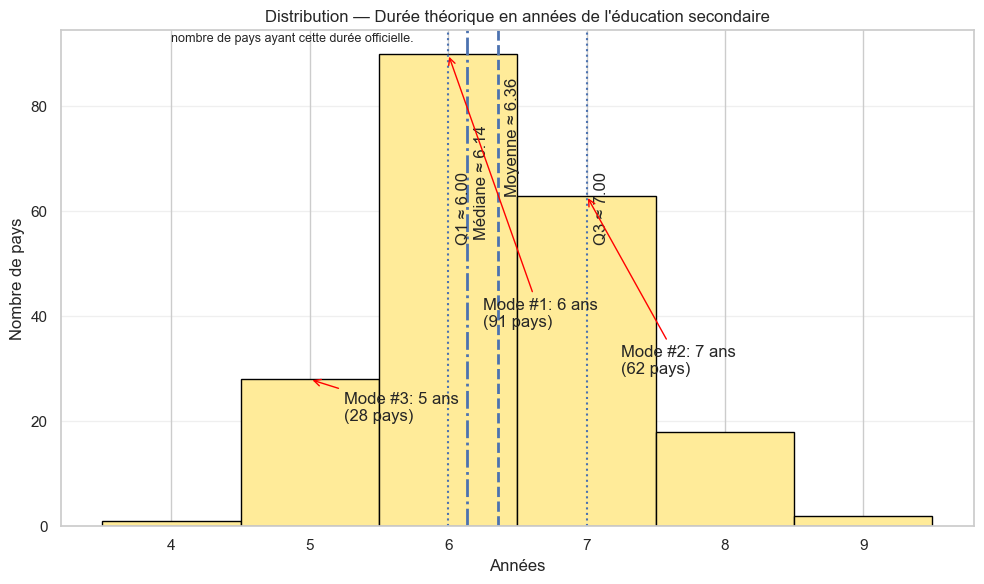

In [49]:
x = s.dropna().astype(float)

# Stats utiles
mean_ = x.mean()
median_ = x.median()
q1, q3 = x.quantile([0.25, 0.75])
xmin, xmax = x.min(), x.max()

# Bins centrés sur les entiers (4,5,6,7,8,9…)
left = np.floor(xmin) - 0.5
right = np.ceil(xmax) + 0.5
bins = np.arange(left, right + 1, 1.0)

plt.figure(figsize=(10, 6))

# Histogramme : barres jaune pâle
counts, bin_edges, patches = plt.hist(
    x,
    bins=bins,
    edgecolor='black',
    color='#FFEB99'  # jaune pâle
)

plt.title("Distribution — Durée théorique en années de l'éducation secondaire")
plt.xlabel("Années")
plt.ylabel("Nombre de pays")
plt.grid(True, axis='y', alpha=0.3)

# Lignes (moyenne, médiane, quartiles)
plt.axvline(mean_, linestyle='--', linewidth=2)
plt.text(mean_ + 0.05, max(counts)*0.95, f"Moyenne ≈ {mean_:.2f}", rotation=90, va='top')

plt.axvline(median_, linestyle='-.', linewidth=2)
plt.text(median_ + 0.05, max(counts)*0.85, f"Médiane ≈ {median_:.2f}", rotation=90, va='top')

plt.axvline(q1, linestyle=':', linewidth=1.5)
plt.text(q1 + 0.05, max(counts)*0.75, f"Q1 ≈ {q1:.2f}", rotation=90, va='top')

plt.axvline(q3, linestyle=':', linewidth=1.5)
plt.text(q3 + 0.05, max(counts)*0.75, f"Q3 ≈ {q3:.2f}", rotation=90, va='top')

# Annotations des modes (valeurs les plus fréquentes) avec flèches rouges
modes = x.round().value_counts().sort_values(ascending=False).head(3)
for i, (val, cnt) in enumerate(modes.items(), start=1):
    # hauteur de la barre correspondant à 'val'
    idx = int(val - (left + 0.5))
    height = counts[idx] if 0 <= idx < len(counts) else max(counts)

    plt.annotate(
        f"Mode #{i}: {int(val)} ans\n({int(cnt)} pays)",
        xy=(val, height),
        xytext=(val + 0.25, max(counts)*(0.55 - 0.1*i)),
        arrowprops=dict(arrowstyle="->", color='red'),  # flèche rouge
        ha='left', va='center'
    )

# Rappel de lecture
plt.text(
    xmin, max(counts)*1.02,
    "nombre de pays ayant cette durée officielle.",
    fontsize=9, va='bottom'
)

plt.tight_layout()
plt.show()


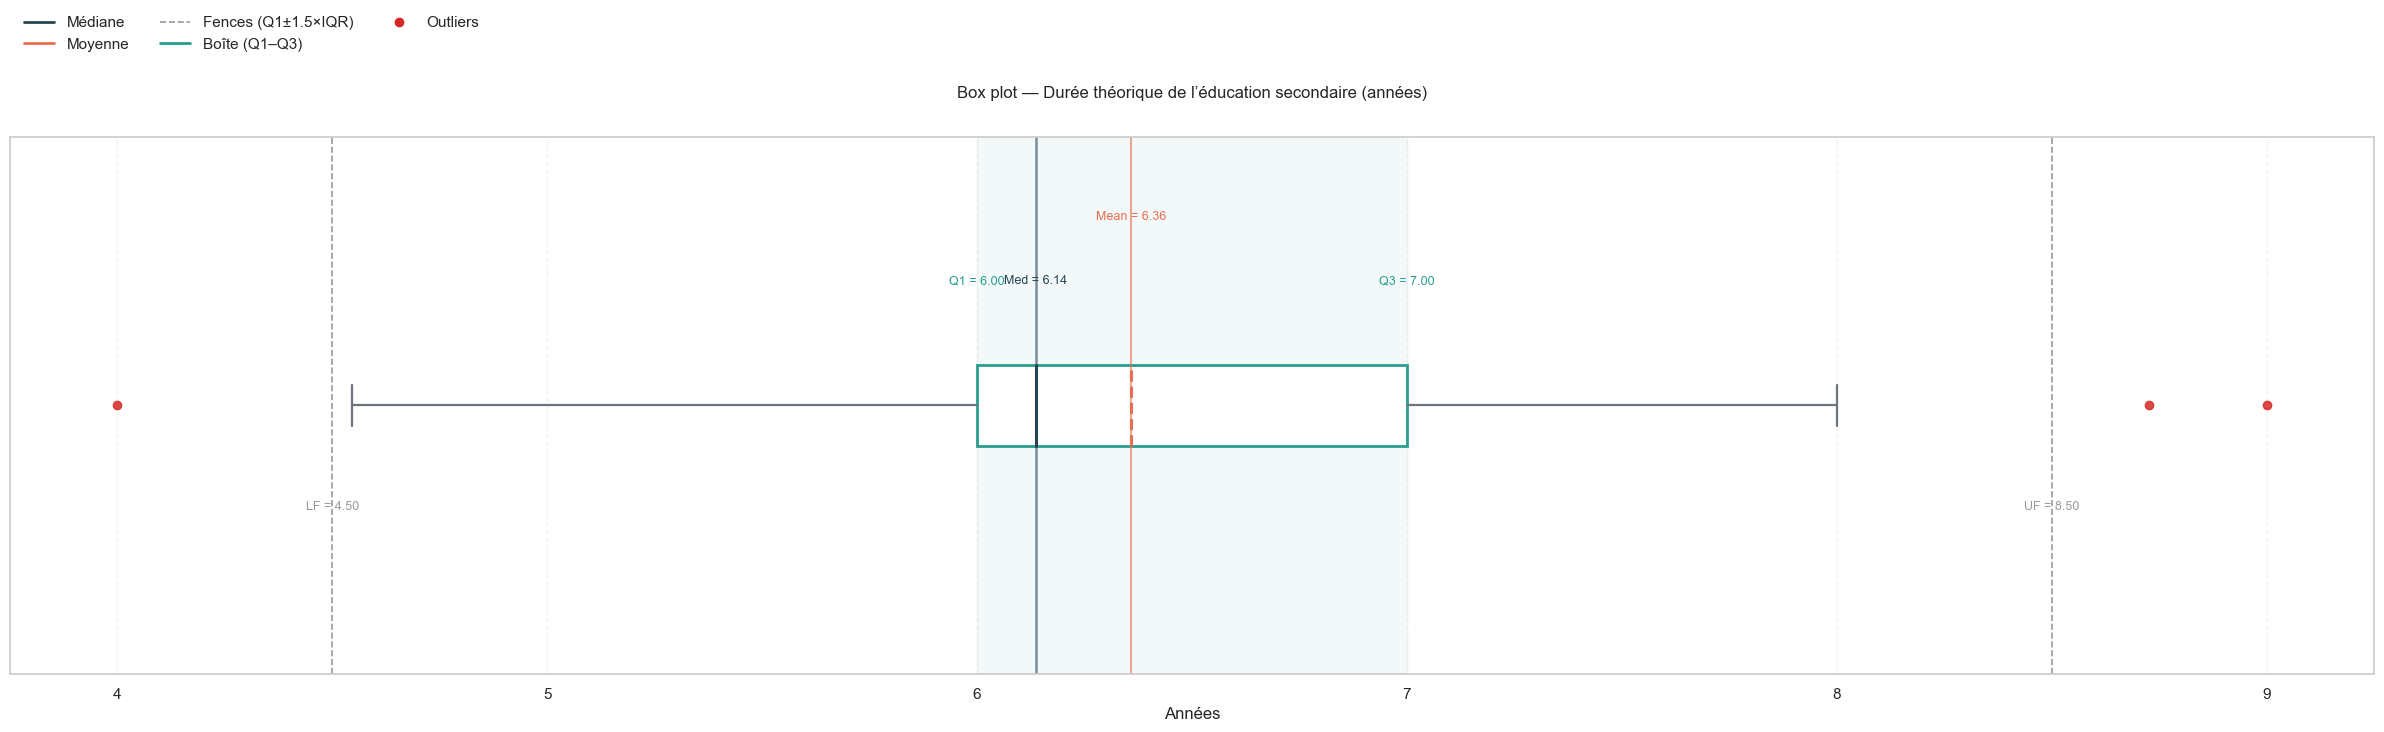

In [50]:
# BOX PLOT — Durée théorique du secondaire (années)
# Hypothèse : la série `s` existe déjà, ex :
# s = df_indicateurs_peu_corr.set_index('Country Name')["Theoretical duration of secondary education (years)"].astype(float)


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Préparation des données ---
x = pd.to_numeric(s, errors='coerce').dropna()

# Statistiques utiles
q1  = x.quantile(0.25)
med = x.quantile(0.50)
q3  = x.quantile(0.75)
iqr = q3 - q1
lf  = q1 - 1.5 * iqr   # lower fence
uf  = q3 + 1.5 * iqr   # upper fence
mean = x.mean()

# Détection des outliers selon règle 1.5*IQR
outliers = x[(x < lf) | (x > uf)]

# --- Style et couleurs ---
color_box   = "#2a9d8f"
color_mean  = "#e76f51"
color_med   = "#264653"
color_fence = "#999999"
color_fill  = "#e9f5f3"
color_whisk = "#6c757d"
color_out   = "#d62828"

plt.figure(figsize=(24, 7.6))

# Fond subtil sous l'IQR (Q1–Q3) pour l’œil
plt.axvspan(q1, q3, color=color_fill, alpha=0.5, zorder=0)

# Boxplot horizontal
bp = plt.boxplot(
    x,
    vert=False,
    showmeans=True,
    whis=1.5,
    patch_artist=True,      # permet de colorer la boîte
    meanline=True,          # affiche la moyenne en ligne
    meanprops=dict(color=color_mean, linewidth=2.2),
    medianprops=dict(color=color_med, linewidth=2.2),
    boxprops=dict(facecolor="white", edgecolor=color_box, linewidth=2),
    whiskerprops=dict(color=color_whisk, linewidth=1.6),
    capprops=dict(color=color_whisk, linewidth=1.6),
    flierprops=dict(marker='o', markerfacecolor=color_out, markeredgecolor=color_out, alpha=0.85, markersize=6)
)

# Fences (limites théoriques des moustaches)
plt.axvline(lf, linestyle='--', linewidth=1.2, color=color_fence)
plt.axvline(uf, linestyle='--', linewidth=1.2, color=color_fence)

# Lignes de repère et annotations (optionnelles mais utiles)
plt.axvline(med, color=color_med, linewidth=1.8, alpha=0.6)
plt.axvline(mean, color=color_mean, linewidth=1.5, alpha=0.6)

# Annotations numériques (petites étiquettes)
def annotate_x(val, label, y=1.18, color="#333"):
    plt.text(val, y, f"{label} = {val:.2f}", ha='center', va='bottom', fontsize=9, color=color, rotation=0)

annotate_x(q1,  "Q1",  y=1.22, color=color_box)
annotate_x(med, "Med", y=1.22, color=color_med)
annotate_x(q3,  "Q3",  y=1.22, color=color_box)
annotate_x(mean,"Mean",y=1.34, color=color_mean)
annotate_x(lf,  "LF",  y=0.80, color=color_fence)
annotate_x(uf,  "UF",  y=0.80, color=color_fence)

# Légende manuelle élégante
legend_elements = [
    Line2D([0], [0], color=color_med,  lw=2, label="Médiane"),
    Line2D([0], [0], color=color_mean, lw=2, label="Moyenne"),
    Line2D([0], [0], color=color_fence, lw=1.2, ls='--', label="Fences (Q1±1.5×IQR)"),
    Line2D([0], [0], color=color_box,  lw=2, label="Boîte (Q1–Q3)"),
    Line2D([0], [0], marker='o', color='w', label="Outliers", markerfacecolor=color_out, markeredgecolor=color_out, markersize=6),
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1.25), ncol=3, frameon=False)

plt.title("Box plot — Durée théorique de l’éducation secondaire (années)", pad=28)
plt.xlabel("Années")
plt.yticks([])  # un seul box, axe Y inutile
plt.grid(axis='x', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


### 🧰 Lecture du box plot — Durée théorique du secondaire

**Ce que montre le graphique :**
- La **boîte** (en blanc, bord vert) va de **Q1** (1er quartile) à **Q3** (3e quartile) : c’est l’**IQR** (Interquartile Range).
- La **ligne médiane** (**Med**) au centre de la boîte est le **2e quartile (Q2)**.
- La **moyenne** (**Mean**) est affichée séparément (ligne rouge), utile pour détecter une **asymétrie** (Mean ≠ Med).
- Les **moustaches** s’étendent jusqu’aux valeurs situées dans l’intervalle **[Q1−1.5×IQR, Q3+1.5×IQR]**.
- Les **fences** (`LF`, `UF`) sont ces bornes théoriques. Les points au-delà sont des **outliers** (en rouge).

**Comment interpréter :**
- Si **Mean > Med**, la distribution a une **queue à droite** (quelques pays avec durées plus longues).
- Un **IQR faible** → faible dispersion entre pays ; **IQR élevé** → forte hétérogénéité.
- **Outliers** : pays aux durées très atypiques (à vérifier qualitativement : système scolaire différent, cycles regroupés, etc.).

**Pourquoi horizontal ?**
- L’échelle « années » se lit mieux à l’horizontale et laisse de la place aux annotations.

**Notes de méthode :**
- Les valeurs manquantes sont **exclues** avant le calcul (`dropna()`).
- Les **outliers** sont définis par la règle classique **1.5×IQR**.
- Les valeurs numériques affichées (Q1, Med, Q3, Mean, LF, UF) aident à **documenter** précisément le graphique.


In [ ]:
# ==========================================
# 2) Factorisation : fonction d’analyse
# ==========================================
def analyze_indicator(df, colname, country_col='Country Name', bins=30, kde=True, plot=True):
    """
    Calcule les stats descriptives d'un indicateur et en trace la distribution.
    Retourne un DataFrame (ligne unique) avec les stats de base.
    """
    if country_col in df.columns:
        series = df.set_index(country_col)[colname].astype(float)
    else:
        series = df[colname].astype(float)
        
    desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max
    out = desc.to_frame(name=colname).T  # ligne unique
    
    if plot:
        sns.set_theme(style="whitegrid")
        g = sns.displot(series.dropna(), bins=bins, kde=kde, height=4, aspect=1.6)
        g.fig.suptitle(f"Distribution — {colname}", y=1.02)
        plt.xlabel("Valeur")
        plt.show()
    return out

# Test sur l’indicateur d’exemple (avec plot)
_ = analyze_indicator(df_indicateurs_peu_corr, indic_exemple, plot=True)


In [ ]:
def analyze_indicator2(
    df, 
    colname, 
    colname_fr=None, 
    country_col='Country Name', 
    binwidth=0.5, 
    kde=True, 
    plot=True
):
    """
    Analyse statistique et graphique d'un indicateur numérique.
    
    Paramètres :
    - df : DataFrame contenant les données
    - colname : nom de la colonne à analyser
    - colname_fr : nom "humain" ou traduit pour l'affichage (facultatif)
    - country_col : colonne à utiliser comme index si présente (par défaut : 'Country Name')
    - binwidth : largeur des classes de l'histogramme
    - kde : affiche la courbe de densité (kernel density estimation)
    - plot : affiche le graphique
    
    Retourne :
    - DataFrame ligne unique avec les statistiques descriptives
    """
    
    # Série avec index
    if country_col in df.columns:
        s = df.set_index(country_col)[colname].astype(float)
    else:
        s = df[colname].astype(float)

    # Statistiques de base
    stats = s.describe()
    variance_val = s.var()
    mean_val = s.mean()
    std_val = s.std()

    # DataFrame de retour
    out = stats.to_frame(name=colname).T
    out['variance'] = variance_val

    if plot:
        x = s.dropna()

        xmin = np.floor(x.min() / binwidth) * binwidth
        xmax = np.ceil(x.max() / binwidth) * binwidth

        plt.figure(figsize=(10, 4.5))
        sns.set_theme(style="whitegrid")

        sns.histplot(x, binwidth=binwidth, kde=kde, color="teal", edgecolor="white", alpha=0.9)

        # Moyenne
        plt.axvline(mean_val, color="#d62728", linestyle="--", linewidth=2, label=f"Moyenne = {mean_val:.2f}")

        # ±1 écart-type
        plt.axvline(mean_val - std_val, color="orange", linestyle=":", linewidth=1.8, label=f"-1 σ = {mean_val - std_val:.2f}")
        plt.axvline(mean_val + std_val, color="orange", linestyle=":", linewidth=1.8, label=f"+1 σ = {mean_val + std_val:.2f}")

        # Graduation x
        xticks = np.arange(xmin, xmax + binwidth, binwidth)
        plt.xticks(xticks)

        # Titre et labels
        display_name = colname_fr if colname_fr else colname
        plt.title(f"Distribution — {display_name}")
        plt.xlabel("Valeur")
        plt.ylabel("Effectif")

        # Affichage variance
        plt.text(xmax - binwidth, plt.ylim()[1]*0.9, f"Variance = {variance_val:.2f}", color="black", fontsize=10, ha="right")

        plt.legend()
        plt.tight_layout()
        plt.show()

    return out


# Test sur l’indicateur d’exemple (avec plot)
_ = analyze_indicator2(df_indicateurs_peu_corr, indic_exemple, plot=True)


In [ ]:
# ===========================================================
# 3) Boucle : appliquer la fonction à TOUS les indicateurs
# ===========================================================

# Liste des colonnes indicateurs
if 'Country Name' in df_indicateurs_peu_corr.columns:
    indic_cols = [c for c in df_indicateurs_peu_corr.columns if c != 'Country Name']
else:
    indic_cols = list(df_indicateurs_peu_corr.columns)

# --- Partie 1 : Stats sans graphique ---
stats_all = []
for col in indic_cols:
    result = analyze_indicator2(df_indicateurs_peu_corr, col, plot=False)
    stats_all.append(result)

# Concaténation des résultats
stats_all = pd.concat(stats_all, axis=0)
display(stats_all.head())

# --- Partie 2 :  ---
# Exemple : les 7 premiers indicateurs
for col in indic_cols[:7]:
    _ = analyze_indicator2(df_indicateurs_peu_corr, col, plot=True)


In [51]:
# ==========================================
# (A) Pays extrêmes sur l’indicateur choisi
# ==========================================
if 'Country Name' in df_indicateurs_peu_corr.columns:
    df_idx = df_indicateurs_peu_corr.set_index('Country Name').copy()
else:
    df_idx = df_indicateurs_peu_corr.copy()

s = df_idx[indic_exemple].astype(float)

# 10 pays les plus faibles (valeurs min)
pays_faibles = s.sort_values(ascending=True).head(10).index.tolist()
# 10 pays les plus élevés
pays_forts = s.sort_values(ascending=False).head(10).index.tolist()

print("🌍 10 pays aux valeurs les plus faibles (indicateur d'exemple) :")
print(pays_faibles)
print("\n🌍 10 pays aux valeurs les plus élevées (indicateur d'exemple) :")
print(pays_forts)


🌍 10 pays aux valeurs les plus faibles (indicateur d'exemple) :
['Philippines', 'Singapore', 'Peru', 'St. Lucia', 'Botswana', 'South Africa', 'Sint Maarten (Dutch part)', 'Sudan', 'Guyana', 'Nicaragua']

🌍 10 pays aux valeurs les plus élevées (indicateur d'exemple) :
['Germany', 'Slovak Republic', 'Italy', 'Croatia', 'Romania', 'Macedonia, FYR', 'Czech Republic', 'West Bank and Gaza', 'Hungary', 'Lithuania']


🧾 Indicateurs utilisés pour le score composite :
['Enrolment in secondary education, both sexes (number)', 'Official entrance age to upper secondary education (years)', 'Percentage of students in secondary education enrolled in general programmes, both sexes (%)', 'Percentage of students in secondary general education who are female (%)', 'Theoretical duration of lower secondary education (years)', 'Theoretical duration of secondary education (years)', 'Theoretical duration of upper secondary education (years)']

📉 Extrait des Z-scores :


Indicator Name,"Enrolment in secondary education, both sexes (number)",Official entrance age to upper secondary education (years),"Percentage of students in secondary education enrolled in general programmes, both sexes (%)",Percentage of students in secondary general education who are female (%),Theoretical duration of lower secondary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years)
Country Name,,,,,,,
Afghanistan,-0.133911,0.983484,0.895755,-3.824577,-0.504145,-0.419326,0.048571
Albania,-0.215277,-0.978331,0.226902,0.234723,0.793536,1.603135,1.084742
Algeria,0.104092,-0.072878,0.367808,0.236293,0.203681,0.219346,0.048571
American Samoa,-0.260042,0.983484,NaN,NaN,-0.936705,NaN,-1.376165
Andorra,-0.259960,0.983484,0.445550,0.258549,0.793536,-0.099990,-0.987601



🏆 TOP 10 pays (score composite le plus élevé) :


,score
Country Name,
India,1.408317
Germany,1.120785
China,0.992760
Lithuania,0.930050
West Bank and Gaza,0.885237
Brazil,0.653804
Slovak Republic,0.617816
Uzbekistan,0.579275
Hungary,0.561956



⚠️ BOTTOM 10 pays (score composite le plus faible) :


,score
Country Name,
Philippines,-0.615590
Belgium,-0.650348
"Congo, Dem. Rep.",-0.685194
Honduras,-0.713387
Guinea-Bissau,-0.729984
Singapore,-0.782145
Somalia,-0.793776
Curacao,-0.809925
Sint Maarten (Dutch part),-0.951566


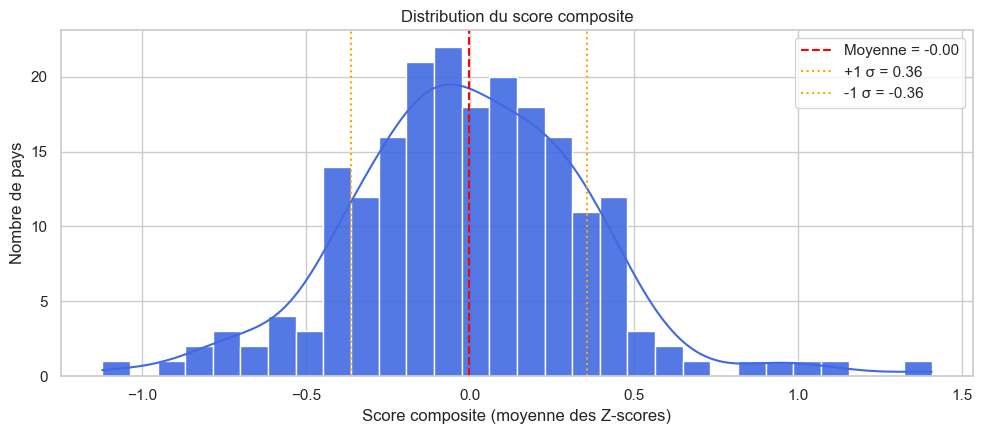

In [57]:

# =========================================================================
# SCORE COMPOSITE PAR Z-SCORES — VERSION EXPLICITE ET COMMENTÉE
# =========================================================================

# 🟡 Etape 0 : Aperçu des indicateurs utilisés
print("🧾 Indicateurs utilisés pour le score composite :")
print(df_idx.columns.tolist())

# 🟢 Etape 1 : Calcul des Z-scores (standardisation par indicateur)
mu = df_idx.mean(axis=0, skipna=True)
sigma = df_idx.std(axis=0, ddof=0, skipna=True)  # ddof=0 → écart-type population

Z = (df_idx - mu).divide(sigma.replace(0, np.nan))  # standardisation

# Affichage d’un extrait
print("\n📉 Extrait des Z-scores :")
display(Z.head())

# 🔵 Etape 2 : Calcul du score composite (moyenne des Z-scores)
score_composite = Z.mean(axis=1, skipna=True).to_frame(name='score')

# 🔢 Etape 3 : Classement des pays
ranking_global = score_composite.sort_values(by='score', ascending=False)

# Ajout du score au DataFrame original
df_scores = df_idx.copy()
df_scores['score_composite'] = score_composite

# Affichage des scores des 10 premiers pays
print("\n🏆 TOP 10 pays (score composite le plus élevé) :")
display(ranking_global.head(10))

print("\n⚠️ BOTTOM 10 pays (score composite le plus faible) :")
display(ranking_global.tail(10))

# 🔴 Etape 4 : Visualisation de la distribution des scores
plt.figure(figsize=(10, 4.5))
sns.set_theme(style="whitegrid")

sns.histplot(score_composite['score'], bins=30, kde=True, color="royalblue", edgecolor="white", alpha=0.9)

plt.title("Distribution du score composite")
plt.xlabel("Score composite (moyenne des Z-scores)")
plt.ylabel("Nombre de pays")

# Moyenne et ±1 σ
mean_score = score_composite['score'].mean()
std_score = score_composite['score'].std()

plt.axvline(mean_score, color='red', linestyle='--', label=f"Moyenne = {mean_score:.2f}")
plt.axvline(mean_score + std_score, color='orange', linestyle=':', label=f"+1 σ = {mean_score + std_score:.2f}")
plt.axvline(mean_score - std_score, color='orange', linestyle=':', label=f"-1 σ = {mean_score - std_score:.2f}")

plt.legend()
plt.tight_layout()
plt.show()


# 🧠 Analyse de Score Composite par Z-scores

## ✅ Objectif

L’objectif est de construire un **score composite** pour comparer les pays sur la base de plusieurs **indicateurs éducatifs**.  
Ce score permet de synthétiser l'information multidimensionnelle en une seule valeur par pays.

---

## 🔎 Méthode des Z-scores : standardisation

Le **Z-score** (ou standard score) permet de comparer des valeurs provenant de distributions différentes.

La formule du Z-score pour une valeur `x` est :

$Z = \frac{x - \mu}{\sigma}$

où :
- $( \mu )$ est la moyenne de la variable,
- $( \sigma)$ est son écart-type.

Cela transforme chaque indicateur pour qu’il ait :
- une **moyenne de 0**,
- un **écart-type de 1**.

### ➕ Avantages :
- Permet de **comparer** des indicateurs de natures différentes (par exemple, des taux, des durées, etc.).
- Réduit l’influence d’échelles différentes.
- Les valeurs positives signifient **"au-dessus de la moyenne"** et les négatives, **"en dessous"**.

---

## 🧮 Construction du Score Composite

Une fois les Z-scores calculés pour chaque indicateur, on les **moyenne ligne par ligne (par pays)** :

$
\text{Score composite}_{\text{pays}} = \frac{1}{n} \sum_{i=1}^n Z_{i}
$

où \( n \) est le nombre d’indicateurs disponibles pour le pays.

---

## 📊 Résultat

- Les **pays avec des scores composites élevés** sont ceux qui performent bien sur la majorité des indicateurs.
- Les **scores composites bas** reflètent des performances globalement inférieures à la moyenne.

La distribution du score permet aussi d’identifier :
- Les pays **exceptionnellement performants (à droite)**,
- Les pays **en difficulté (à gauche)**.

---

## 🚀 Extensions possibles

- Inverser certains indicateurs (ex: taux d'abandon → plus bas = mieux).
- Pondérer certains indicateurs (donner plus de poids à ce qui est jugé prioritaire).
- Appliquer des méthodes plus avancées (PCA, clustering…).

